<a href="https://colab.research.google.com/github/itskirito/Terraza-restaurant-website.github.io/blob/main/FINALISEDGRAPHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`REGISTRATION SCHEME`**

**REGITRATION SCHEME CODE:**
Based on computation, SHA-256 is generally considered more computationally intensive compared to SHA-1. SHA-256 belongs to the SHA-2 family of hash functions, which provides a higher level of security and larger hash output (256 bits) compared to SHA-1.

In terms of computational performance, SHA-1 is faster than SHA-256 because it operates on smaller hash output (160 bits) and has simpler operations. However, SHA-1 is considered weak and vulnerable to collision attacks, which means it may not provide the same level of security as SHA-256.

Therefore, if computational efficiency is a primary concern and the security requirements can be adequately met by SHA-1, it might be preferred due to its faster computation. However, if stronger security is required, SHA-256 is generally recommended, even though it may be computationally more expensive.

It's important to note that the choice of algorithm should also consider the specific security requirements, the potential for future attacks, and compliance with industry standards or regulations. In general, for modern applications, it is recommended to use SHA-256 or higher for stronger security guarantees, even if it comes at a slightly higher computational cost.

**WORKING IOF THE REGISTRATION FUNCTION:** The given code represents a basic utility data center (UDC) system. It allows for the registration of Electric Vehicles (EVs), Charging Stations (CSs), and Roadside Units (RSUs). Each entity is assigned key pairs and pseudo-identities to enable secure communication within the system.

The core component of the UDC system is the UDCSystem class. It includes the following attributes:

evs: A dictionary used to store registered EVs. Each EV is associated with a dictionary containing its key pairs and pseudo-identities.
css: Similar to evs, this dictionary stores registered CSs (Charging Stations).
rsus: Similar to evs and css, this dictionary stores registered RSUs (Roadside Units).
revocation_list: A set that keeps track of revoked identities.
The UDCSystem class provides three registration methods: register_ev, register_cs, and register_rsu. These methods share a similar registration process, which can be summarized as follows:

Step 2: Verify the timestamp: This step ensures that the registration occurs within the allowed execution range. The execution range can be customized based on specific requirements.

Step 3: Check if the entity identity exists: This step verifies whether the entity (EV, CS, or RSU) is already registered in the system or is present in the revocation list. If the identity is found, the registration process fails.

Step 4: Generate key pairs: Random key pairs are generated for the entity using different bit lengths (512, 1024, and 2048). Each key pair consists of a public key and a private key.

Step 5: Calculate pseudo-identities: Pseudo-identities are derived for each key pair using a secure hash function (SHA-256). The pseudo-identity is computed by hashing the concatenation of the private key and the entity identity.

Step 6: Store entity information: The generated key pairs and pseudo-identities are stored in the respective dictionaries (evs, css, or rsus) using the entity's name as the key.

The UDCSystem class also includes several helper methods:

_is_within_execution_range: This method checks if the provided timestamp falls within the allowed execution range. The specific logic for the execution range can be customized.
_generate_key_pairs: It generates random key pairs with different bit lengths.
_generate_private_key: It generates a random private key with the specified bit length.
_derive_public_key: It derives the public key from the private key using the SHA-256 hash function.
_calculate_pseudo_identities: It calculates the pseudo-identities for the given key pairs and entity identity using the SHA-256 hash function.
_format_key_pairs: It formats the key pairs for display purposes.
_format_pseudo_identities: It formats the pseudo-identities for display purposes.
The provided example usage demonstrates the registration process for EVs, CSs, and RSUs by creating instances of the UDCSystem class and calling the respective registration methods for each entity. The registration results are then printed to the console, displaying the generated key pairs and pseudo-identities for each entity.

Overall, this code establishes a simple UDC system that allows the registration of EVs, CSs, and RSUs. It provides secure communication capabilities through key pairs and pseudo-identities.

**NOW HERE, We will compare the security aspects based upon the 512, 1024, 2048 BITS (OR, 64, 128, 254 bytes in hexadecimal) keys pairs GENERATED USING SHA-256 HASH FUNCTION.**

In [ ]:
import hashlib
import os

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.rsus = {}
        self.revocation_list = set()

    def register_ev(self, ev_name, ev_timestamp):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_name in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pairs
        key_pairs = self._generate_key_pairs()

        # Step 5: Calculate pseudo-identities
        pseudo_identities = self._calculate_pseudo_identities(key_pairs, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "key_pairs": key_pairs,
            "pseudo_identities": pseudo_identities
        }

        return f"{ev_name} registration successful.\nKey Pairs:\n{self._format_key_pairs(key_pairs)}\nPseudo-Identities:\n{self._format_pseudo_identities(pseudo_identities)}"

    def register_cs(self, cs_name, cs_timestamp):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(cs_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if CS identity exists in the database or revocation list
        if cs_name in self.css:
            return "Registration failed. CS identity already registered."
        if cs_name in self.revocation_list:
            return "Registration failed. CS identity is illegal."

        # Step 4: Generate key pairs
        key_pairs = self._generate_key_pairs()

        # Step 5: Calculate pseudo-identities
        pseudo_identities = self._calculate_pseudo_identities(key_pairs, cs_name)

        # Step 6: Store CS information
        self.css[cs_name] = {
            "key_pairs": key_pairs,
            "pseudo_identities": pseudo_identities
        }

        return f"{cs_name} registration successful.\nKey Pairs:\n{self._format_key_pairs(key_pairs)}\nPseudo-Identities:\n{self._format_pseudo_identities(pseudo_identities)}"

    def register_rsu(self, rsu_name, rsu_timestamp):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(rsu_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if RSU identity exists in the database or revocation list
        if rsu_name in self.rsus:
            return "Registration failed. RSU identity already registered."
        if rsu_name in self.revocation_list:
            return "Registration failed. RSU identity is illegal."

        # Step 4: Generate key pairs
        key_pairs = self._generate_key_pairs()

        # Step 5: Calculate pseudo-identities
        pseudo_identities = self._calculate_pseudo_identities(key_pairs, rsu_name)

        # Step 6: Store RSU information
        self.rsus[rsu_name] = {
            "key_pairs": key_pairs,
            "pseudo_identities": pseudo_identities
        }

        return f"{rsu_name} registration successful.\nKey Pairs:\n{self._format_key_pairs(key_pairs)}\nPseudo-Identities:\n{self._format_pseudo_identities(pseudo_identities)}"

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pairs(self):
        # Generate key pairs with different bit lengths
        key_pairs = []
        bit_lengths = [512, 1024, 2048]

        for bit_length in bit_lengths:
            # Generate a random key pair
            private_key = self._generate_private_key(bit_length)
            public_key = self._derive_public_key(private_key)

            # Add the key pair to the list
            key_pairs.append((public_key, private_key))

        return key_pairs

    def _generate_private_key(self, bit_length):
        # Generate a random private key with the specified bit length
        private_key = os.urandom(bit_length // 8)
        return private_key

    def _derive_public_key(self, private_key):
        # Derive the public key from the private key
        hash_input = hashlib.sha256(private_key).digest()
        public_key = hashlib.sha256(hash_input).digest()
        return public_key

    def _calculate_pseudo_identities(self, key_pairs, identity):
        # Calculate pseudo-identities for each key pair
        pseudo_identities = []

        for public_key, private_key in key_pairs:
            # Use a secure hash function, such as SHA-256, to calculate the pseudo-identity
            hash_input = private_key + identity.encode()
            pseudo_identity = hashlib.sha256(hash_input).hexdigest()
            pseudo_identities.append(pseudo_identity)

        return pseudo_identities

    def _format_key_pairs(self, key_pairs):
        # Format key pairs for display
        formatted_key_pairs = ""
        for i, (public_key, private_key) in enumerate(key_pairs):
            formatted_key_pairs += f"Key Pair {i + 1}:\nPublic Key: {public_key.hex()}\nPrivate Key: {private_key.hex()}\n\n"
        return formatted_key_pairs

    def _format_pseudo_identities(self, pseudo_identities):
        # Format pseudo-identities for display
        formatted_pseudo_identities = ""
        for i, pseudo_identity in enumerate(pseudo_identities):
            formatted_pseudo_identities += f"Pseudo-Identity {i + 1}: {pseudo_identity}\n"
        return formatted_pseudo_identities

# Example usage
udc_system = UDCSystem()

# EV registration
ev_names = ["EV1", "EV2", "EV3"]
ev_timestamp = "2023-06-28T12:00:00"

for ev_name in ev_names:
    ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp)
    print(ev_registration_result)

# CS registration
cs_names = ["CS1", "CS2", "CS3"]
cs_timestamp = "2023-06-28T12:00:00"

for cs_name in cs_names:
    cs_registration_result = udc_system.register_cs(cs_name, cs_timestamp)
    print(cs_registration_result)

# RSU registration
rsu_names = ["RSU1", "RSU2", "RSU3"]
rsu_timestamp = "2023-06-28T12:00:00"

for rsu_name in rsu_names:
    rsu_registration_result = udc_system.register_rsu(rsu_name, rsu_timestamp)
    print(rsu_registration_result)


EV1 registration successful.
Key Pairs:
Key Pair 1:
Public Key: ec93c4dbf21ab1e17e91bce9f9df63d931c7f0600e7310986f50bc631ec28f5b
Private Key: 4846c0ca3740dc8a1002e9430a8063719ff6f531809e8be1f694054188f6dd36b90afa5ff6e4f6e7742cb2a52a5a7ad5ba2bb2f07f77f826bde474ba5cb5d1ca

Key Pair 2:
Public Key: e4a3e56ce000a7c6865b589ca631e4b59a4415cc307c0f6df35fb4fc3b82777a
Private Key: 605e26367a3fa81b3819970ffdb7067f1061952ac79dd15fed4f7f626ad36fa1f7d07d35199fffa1797357b22df205f81af6ef4cf0ffb4ec594e80029955c9c46e2fd1cb68ce86bb9533f01cea2b86a32fc1edb0a4317669bc588e5af319921f0d7852b61fe681e271840cb05875324dedb946620fb0ddd24f13e12f9e47503b

Key Pair 3:
Public Key: 7fe885e0e0db71a01a758577be04b782fa81bdfad453cd0829d90374edea265b
Private Key: 85b454abff65067cb1966c9beae7ada7766163bc6e2fb86dd097cc100efc941650524f4a2050e5a53c8fbb6fc0400dea9592b4a7336802c96674c623d50f4a4a7ae73a0dd12d72f8d3e58c76f101bea9d2c4fab0539b1f9364fbeafc28d9eb1dcc80629a6404d1f676d268afbcab4e08380b1d7d63ff4bdeed9a1996cff8223e6daedbac89

**IN THE ABOVE CODES, WE WERE USING SHA-256 ALGORITHM, NOW WE WILL USE THE SHA 1 HASH FUNCTION ALGORITHM FOR THE HASHING.**

In [ ]:
import hashlib
import os

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.rsus = {}

    def register_ev(self, ev_name, ev_timestamp):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."

        # Step 4: Generate key pairs
        key_pairs = self._generate_key_pairs()

        # Step 5: Calculate pseudo-identities
        pseudo_identities = self._calculate_pseudo_identities(key_pairs, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "key_pairs": key_pairs,
            "pseudo_identities": pseudo_identities
        }

        return f"{ev_name} registration successful.\nKey Pairs:\n{self._format_key_pairs(key_pairs)}\nPseudo-Identities:\n{self._format_pseudo_identities(pseudo_identities)}"

    def register_cs(self, cs_name, cs_timestamp):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(cs_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if CS identity exists in the database or revocation list
        if cs_name in self.css:
            return "Registration failed. CS identity already registered."

        # Step 4: Generate key pairs
        key_pairs = self._generate_key_pairs()

        # Step 5: Calculate pseudo-identities
        pseudo_identities = self._calculate_pseudo_identities(key_pairs, cs_name)

        # Step 6: Store CS information
        self.css[cs_name] = {
            "key_pairs": key_pairs,
            "pseudo_identities": pseudo_identities
        }

        return f"{cs_name} registration successful.\nKey Pairs:\n{self._format_key_pairs(key_pairs)}\nPseudo-Identities:\n{self._format_pseudo_identities(pseudo_identities)}"

    def register_rsu(self, rsu_name, rsu_timestamp):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(rsu_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if RSU identity exists in the database or revocation list
        if rsu_name in self.rsus:
            return "Registration failed. RSU identity already registered."

        # Step 4: Generate key pairs
        key_pairs = self._generate_key_pairs()

        # Step 5: Calculate pseudo-identities
        pseudo_identities = self._calculate_pseudo_identities(key_pairs, rsu_name)

        # Step 6: Store RSU information
        self.rsus[rsu_name] = {
            "key_pairs": key_pairs,
            "pseudo_identities": pseudo_identities
        }

        return f"{rsu_name} registration successful.\nKey Pairs:\n{self._format_key_pairs(key_pairs)}\nPseudo-Identities:\n{self._format_pseudo_identities(pseudo_identities)}"

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pairs(self):
        key_pairs = {
            512: self._generate_key_pair(512),
            1024: self._generate_key_pair(1024),
            2048: self._generate_key_pair(2048)
        }
        return key_pairs

    def _generate_key_pair(self, bit_length):
        private_key = os.urandom(bit_length // 8)
        public_key = hashlib.sha1(private_key).digest()
        return public_key, private_key

    def _calculate_pseudo_identities(self, key_pairs, identity):
        pseudo_identities = {}
        for bit_length, (public_key, private_key) in key_pairs.items():
            pseudo_identity = hashlib.sha1(private_key + identity.encode()).hexdigest()
            pseudo_identities[bit_length] = pseudo_identity
        return pseudo_identities

    def _format_key_pairs(self, key_pairs):
        formatted_key_pairs = ""
        for bit_length, (public_key, private_key) in key_pairs.items():
            formatted_key_pairs += f"Bit Length: {bit_length}\nPublic Key: {public_key.hex()}\nPrivate Key: {private_key.hex()}\n\n"
        return formatted_key_pairs

    def _format_pseudo_identities(self, pseudo_identities):
        formatted_pseudo_identities = ""
        for bit_length, pseudo_identity in pseudo_identities.items():
            formatted_pseudo_identities += f"Bit Length: {bit_length}\nPseudo-Identity: {pseudo_identity}\n\n"
        return formatted_pseudo_identities


# Example usage
udc_system = UDCSystem()

# EV registration
ev_names = ["EV1", "EV2", "EV3"]
ev_timestamp = "2023-06-28T12:00:00"

for ev_name in ev_names:
    ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp)
    print(ev_registration_result)

# CS registration
cs_names = ["CS1", "CS2", "CS3"]
cs_timestamp = "2023-06-28T12:00:00"

for cs_name in cs_names:
    cs_registration_result = udc_system.register_cs(cs_name, cs_timestamp)
    print(cs_registration_result)

# RSU registration
rsu_names = ["RSU1", "RSU2", "RSU3"]
rsu_timestamp = "2023-06-28T12:00:00"

for rsu_name in rsu_names:
    rsu_registration_result = udc_system.register_rsu(rsu_name, rsu_timestamp)
    print(rsu_registration_result)


EV1 registration successful.
Key Pairs:
Bit Length: 512
Public Key: cbe3dd7beb0a5de07188ac83b07a97af8416cb12
Private Key: f306909f9aac7bb5f97b045600b0164ebf5fc6bebb6a6f350e7ae836430f641c9316d30b1eb00a67ba3e33dac9e9a6150afc13ffd248b7e722065448ba260412

Bit Length: 1024
Public Key: 78ae673bd323d74c761c532c42a1c9988e0c9529
Private Key: fb6562db5e7542309d2f5c66500fedc260aa2d638627f9ad2c8952302875b2f18993a9bb4b842e03be04e3084fe118aec5166994191ac988daf06e7e83a33d2d24bffae4f9eada8402acd7eba0135123be0cb2c05bcd8db6567bee74446fdf7d8418bf2c23f0d8a52ac6d100ae88d0d472872335082579c0d74d70d44ae34925

Bit Length: 2048
Public Key: d95d3b49c9ebce8fd9e7aae0f905726c6b42f84a
Private Key: e8d0ff90025e1d94e4d46f8baa438e6b0e6821215de221c8ba4f2a166b5f0db76e148d916bf9e293c314aaba7e30c734a9b783fa29239af1d331309a967c26322f929886fc00d3e4fa6e20acfd0dd9f5534441ad9e85c76facbb41e12547e125a2ad12b5716885501940ca4dfc3fc3dbb21c1037480b5e5c9a12697951bca8822a7267dc5b82124c463705163233ca1c51ff48903a6850dd6fdb471ee825a943f1a1

***HERE WE HAVE A COMBINED GRAPH FOR THE RUNTIME OF DIFFERENT KEYS SIZES AND AS THE NUMBER OF EVS REGISTRATIONS INCREASES. FOR THE KEYS ADN PSEUDO IDENTITIES TO BE GENERATED USING SHA-256 HASHING ALGORITHM:***

Number of EVs: 10, Runtime (512 bits): 75.10 ms
Number of EVs: 10, Runtime (1024 bits): 164.80 ms
Number of EVs: 10, Runtime (2048 bits): 663.37 ms

Number of EVs: 20, Runtime (512 bits): 94.28 ms
Number of EVs: 20, Runtime (1024 bits): 529.77 ms
Number of EVs: 20, Runtime (2048 bits): 1229.79 ms

Number of EVs: 30, Runtime (512 bits): 138.04 ms
Number of EVs: 30, Runtime (1024 bits): 2005.87 ms
Number of EVs: 30, Runtime (2048 bits): 2096.61 ms

Number of EVs: 40, Runtime (512 bits): 187.62 ms
Number of EVs: 40, Runtime (1024 bits): 1572.89 ms
Number of EVs: 40, Runtime (2048 bits): 2345.83 ms

Number of EVs: 50, Runtime (512 bits): 333.33 ms
Number of EVs: 50, Runtime (1024 bits): 1358.51 ms
Number of EVs: 50, Runtime (2048 bits): 3863.83 ms

Number of EVs: 60, Runtime (512 bits): 383.30 ms
Number of EVs: 60, Runtime (1024 bits): 1680.37 ms
Number of EVs: 60, Runtime (2048 bits): 4260.18 ms

Number of EVs: 70, Runtime (512 bits): 335.58 ms
Number of EVs: 70, Runtime (1024 bits): 1232

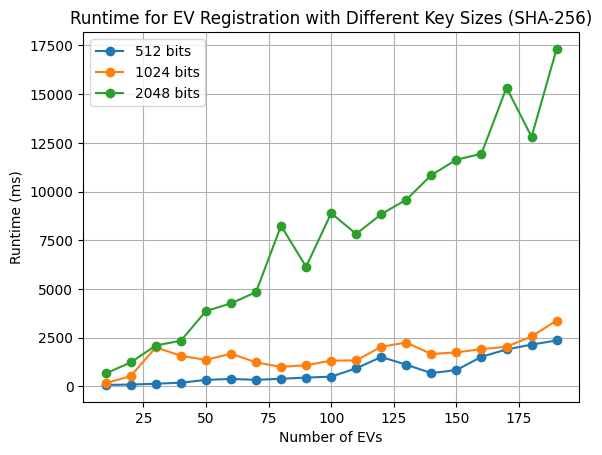

In [ ]:
import hashlib
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.revocation_list = set()

    def register_ev(self, ev_name, ev_timestamp, key_size):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_name in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pair
        public_key, private_key = self._generate_key_pair(key_size)

        # Step 5: Calculate pseudo-identity
        pseudo_identity = self._calculate_pseudo_identity(private_key, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "public_key": public_key,
            "pseudo_identity": pseudo_identity
        }

        return f"{ev_name} registration successful."

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pair(self, key_size):
        # Replace this with your key pair generation logic
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=key_size
        )
        public_key = private_key.public_key()

        return public_key, private_key

    def _calculate_pseudo_identity(self, private_key, identity):
        # Use a secure hash function, such as SHA-256, to calculate the pseudo-identity
        hash_input = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        ) + identity.encode()

        pseudo_identity = hashlib.sha256(hash_input).hexdigest()
        return pseudo_identity

# Function to measure the runtime for the given number of EVs and key size
def measure_runtime(num_evs, key_size):
    udc_system = UDCSystem()

    ev_names = ["EV" + str(i) for i in range(1, num_evs + 1)]
    ev_timestamp = "2023-06-28T12:00:00"

    start_time = time.time()

    for ev_name in ev_names:
        ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp, key_size)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

# Measure the runtime for different numbers of EVs and key sizes
num_evs = list(range(10, 200, 10))
key_sizes = [512, 1024, 2048]

runtimes_512 = []
runtimes_1024 = []
runtimes_2048 = []

for key_size in key_sizes:
    runtimes = []
    for num_ev in num_evs:
        runtime = measure_runtime(num_ev, key_size)
        runtimes.append(runtime)

    if key_size == 512:
        runtimes_512 = runtimes
    elif key_size == 1024:
        runtimes_1024 = runtimes
    elif key_size == 2048:
        runtimes_2048 = runtimes

# Display the (Number of EVs, Runtime) values as output
for i in range(len(num_evs)):
    print(f"Number of EVs: {num_evs[i]}, Runtime (512 bits): {runtimes_512[i]:.2f} ms")
    print(f"Number of EVs: {num_evs[i]}, Runtime (1024 bits): {runtimes_1024[i]:.2f} ms")
    print(f"Number of EVs: {num_evs[i]}, Runtime (2048 bits): {runtimes_2048[i]:.2f} ms")
    print()

# Plotting the graph
plt.plot(num_evs, runtimes_512, marker='o', label="512 bits")
plt.plot(num_evs, runtimes_1024, marker='o', label="1024 bits")
plt.plot(num_evs, runtimes_2048, marker='o', label="2048 bits")

plt.xlabel("Number of EVs")
plt.ylabel("Runtime (ms)")
plt.title("Runtime for EV Registration with Different Key Sizes (SHA-256)")
plt.legend()
plt.grid(True)
plt.show()


***FOR THE KEYS And PSEUDO IDENTITIES TO BE GENERATED USING SHA-1 HASHING ALGORITHM***



Number of EVs: 10, Runtime (512 bits): 65.49 ms
Number of EVs: 10, Runtime (1024 bits): 177.96 ms
Number of EVs: 10, Runtime (2048 bits): 599.62 ms

Number of EVs: 20, Runtime (512 bits): 90.12 ms
Number of EVs: 20, Runtime (1024 bits): 222.02 ms
Number of EVs: 20, Runtime (2048 bits): 1404.71 ms

Number of EVs: 30, Runtime (512 bits): 137.47 ms
Number of EVs: 30, Runtime (1024 bits): 361.16 ms
Number of EVs: 30, Runtime (2048 bits): 1750.07 ms

Number of EVs: 40, Runtime (512 bits): 192.61 ms
Number of EVs: 40, Runtime (1024 bits): 469.17 ms
Number of EVs: 40, Runtime (2048 bits): 3483.70 ms

Number of EVs: 50, Runtime (512 bits): 235.48 ms
Number of EVs: 50, Runtime (1024 bits): 570.81 ms
Number of EVs: 50, Runtime (2048 bits): 3194.47 ms

Number of EVs: 60, Runtime (512 bits): 285.75 ms
Number of EVs: 60, Runtime (1024 bits): 711.42 ms
Number of EVs: 60, Runtime (2048 bits): 3820.47 ms

Number of EVs: 70, Runtime (512 bits): 476.12 ms
Number of EVs: 70, Runtime (1024 bits): 790.74 m

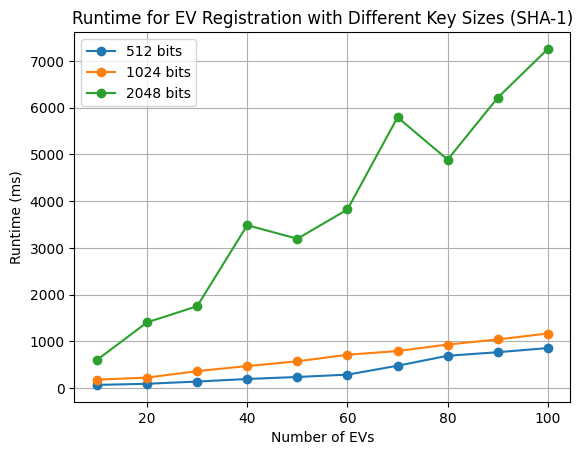

In [ ]:
import hashlib
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization

class UDCSystem:
    def __init__(self):
        self.evs = {}
        self.css = {}
        self.revocation_list = set()

    def register_ev(self, ev_name, ev_timestamp, key_size):
        # Step 2: Verify timestamp
        # Adjust the allowed execution range according to your requirements
        if not self._is_within_execution_range(ev_timestamp):
            return "Registration failed. Timestamp is not within the allowed execution range."

        # Step 3: Check if EV identity exists in the database or revocation list
        if ev_name in self.evs:
            return "Registration failed. EV identity already registered."
        if ev_name in self.revocation_list:
            return "Registration failed. EV identity is illegal."

        # Step 4: Generate key pair
        public_key, private_key = self._generate_key_pair(key_size)

        # Step 5: Calculate pseudo-identity
        pseudo_identity = self._calculate_pseudo_identity(private_key, ev_name)

        # Step 6: Store EV information
        self.evs[ev_name] = {
            "public_key": public_key,
            "pseudo_identity": pseudo_identity
        }

        return f"{ev_name} registration successful."

    def _is_within_execution_range(self, timestamp):
        # Adjust the execution range logic according to your requirements
        return True

    def _generate_key_pair(self, key_size):
        # Replace this with your key pair generation logic
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=key_size
        )
        public_key = private_key.public_key()

        return public_key, private_key

    def _calculate_pseudo_identity(self, private_key, identity):
        # Use a secure hash function, such as SHA-1, to calculate the pseudo-identity
        hash_input = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        ) + identity.encode()

        pseudo_identity = hashlib.sha1(hash_input).hexdigest()
        return pseudo_identity

# Function to measure the runtime for the given number of EVs and key size
def measure_runtime(num_evs, key_size):
    udc_system = UDCSystem()

    ev_names = ["EV" + str(i) for i in range(1, num_evs + 1)]
    ev_timestamp = "2023-06-28T12:00:00"

    start_time = time.time()

    for ev_name in ev_names:
        ev_registration_result = udc_system.register_ev(ev_name, ev_timestamp, key_size)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

# Measure the runtime for different numbers of EVs and key sizes
num_evs = list(range(10, 101, 10))
key_sizes = [512, 1024, 2048]

runtimes_512 = []
runtimes_1024 = []
runtimes_2048 = []

for key_size in key_sizes:
    runtimes = []
    for num_ev in num_evs:
        runtime = measure_runtime(num_ev, key_size)
        runtimes.append(runtime)

    if key_size == 512:
        runtimes_512 = runtimes
    elif key_size == 1024:
        runtimes_1024 = runtimes
    elif key_size == 2048:
        runtimes_2048 = runtimes

# Display the (Number of EVs, Runtime) values as output
for i in range(len(num_evs)):
    print(f"Number of EVs: {num_evs[i]}, Runtime (512 bits): {runtimes_512[i]:.2f} ms")
    print(f"Number of EVs: {num_evs[i]}, Runtime (1024 bits): {runtimes_1024[i]:.2f} ms")
    print(f"Number of EVs: {num_evs[i]}, Runtime (2048 bits): {runtimes_2048[i]:.2f} ms")
    print()

# Plotting the graph
plt.plot(num_evs, runtimes_512, marker='o', label="512 bits")
plt.plot(num_evs, runtimes_1024, marker='o', label="1024 bits")
plt.plot(num_evs, runtimes_2048, marker='o', label="2048 bits")

plt.xlabel("Number of EVs")
plt.ylabel("Runtime (ms)")
plt.title("Runtime for EV Registration with Different Key Sizes (SHA-1)")
plt.legend()
plt.grid(True)
plt.show()


# ***IMPLEMENTATION AND WORKING OF THE AUTHENTICATION SCHEME ***

FOR A KEY PAIRS SIZE AND MESSAGES TO BE GENERATED IN 512 BITS. ALL THESE IMPLEMENTATIO IS WORKING ON THE SHA 1 HASHING ALGORITHM. THE FOLLOWING CODES SHOW THE WORKING FOR THE AUTHENTICATION SCHEME AS HOW THE MESSAGES ARE BEING CREATED AND TRANSFERED AMONG THE CS, EV, RSU AND THE UDC. THEN WE ALSO THE CALCULATION OF THE AUTHENTICATION CHALLENGES THAT ARE BEING TREATED AS THE BASE OF THE AUTHENTICATION AS THEY NEED TO BE VERIFIED BETWEEN ALL THESE ENTITIES. THE FINALLY WE GET TO SEE IF THE AUTHENTICATIO WAS DONE OR NOT IN THE FORM OF A BOOLEAN FORMAT OF TRUE AND FALSE. The UDC system allows for the registration and authentication of entities such as Electric Vehicles (EVs), Charging Stations (CS), and Roadside Units (RSUs).

The UDC class provides methods for registering EVs, CS, and RSUs, as well as calculating authentication values for the UDC system and verifying the authenticity of those values.

The registration process involves generating a key pair (private and public keys) for each entity. The private key is used to calculate a pseudo-identity, which is a unique identifier derived from the combination of the private key and the entity's identity. The public key and pseudo-identity are then returned as the registration result.

The authentication process involves calculating authentication values using the entity's public key, pseudo-identity, and a timestamp. The authentication values are derived by hashing the concatenation of the public key, pseudo-identity, a constant string ("H0" or "H1"), and the timestamp. These values serve as proofs of authenticity during the communication between the entity and the UDC system.

The code also includes a verification step where the calculated authentication values are compared with the expected values based on the provided data. If the calculated and expected values match, the authentication is considered successful.

Overall, this code demonstrates the basic functionality of a UDC system, including entity registration, authentication value calculation, and verification. Note that this implementation is simplified and may not include all the necessary security measures for a real-world system.

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_ev_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()
        auth_udc_ev = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_ev.encode()).hexdigest()
        return auth_ev_udc, auth_udc_ev

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_cs_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()
        auth_udc_cs = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_cs.encode()).hexdigest()
        return auth_cs_udc, auth_udc_cs

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_rsu_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()
        auth_udc_rsu = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_rsu.encode()).hexdigest()
        return auth_rsu_udc, auth_udc_rsu

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048
        )
        public_key = private_key.public_key()

        return private_key, public_key


# Example usage:

udc = UDC()

# Registration process for EVs
ev_identity = "EV1"
ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
print("EV Public Key:", ev_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("EV Pseudo-Identity:", ev_pseudo_identity)

# Registration process for CS
cs_identity = "CS1"
cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)
print("CS Public Key:", cs_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("CS Pseudo-Identity:", cs_pseudo_identity)

# Registration process for RSUs
rsu_identity = "RSU1"
rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)
print("RSU Public Key:", rsu_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("RSU Pseudo-Identity:", rsu_pseudo_identity)

# Authentication process
t_ev = "Tst1"
auth_ev_udc, auth_udc_ev = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)
print("EV Authentication (AuthEV-UDC):", auth_ev_udc)
print("UDC Authentication (AuthUDC-EV):", auth_udc_ev)

t_cs = "Tst2"
auth_cs_udc, auth_udc_cs = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)
print("CS Authentication (AuthCS-UDC):", auth_cs_udc)
print("UDC Authentication (AuthUDC-CS):", auth_udc_cs)

t_rsu = "Tst3"
auth_rsu_udc, auth_udc_rsu = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)
print("RSU Authentication (AuthRSU-UDC):", auth_rsu_udc)
print("UDC Authentication (AuthUDC-RSU):", auth_udc_rsu)

# Verification
expected_auth_ev_udc = hashlib.sha1(ev_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + ev_pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()
expected_auth_cs_udc = hashlib.sha1(cs_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + cs_pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()
expected_auth_rsu_udc = hashlib.sha1(rsu_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + rsu_pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

if auth_ev_udc == expected_auth_ev_udc:
    print("EV Authentication is TRUE")
else:
    print("EV Authentication is FALSE")

if auth_cs_udc == expected_auth_cs_udc:
    print("CS Authentication is TRUE")
else:
    print("CS Authentication is FALSE")

if auth_rsu_udc == expected_auth_rsu_udc:
    print("RSU Authentication is TRUE")
else:
    print("RSU Authentication is FALSE")


EV Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d494942496a414e42676b71686b6947397730424151454641414f43415138414d49494243674b43415145416d4d5a33745453314769534e594364474b3455720a59374d6261483451446e6a575937714c35724352455577715266454d6b39777969436b46664d2b30536b4e302f3646702b464a714275787136686566735736670a77417346514158436d425355644a6f6d4e4b444f3435677a464b4333764631584b735944524f67646932766778784537414b4b5353717a764e7365584a48444b0a594f796c376b6379735947566c6b77664b582b4e6b616c594643324164775049554938507359436372486b555a75542b65787359524a326478635069572f4e6d0a7a67794b32457972635232504274737462746a34656b4e6b6c74744c416f35464d566c4c7235387a687a4e71777575594249346f45567261584c453577534e590a344d56506967386b6841615648706267666e4f50714a61494d5a386c38546d7a66466a49625552665375444373444a78755875394d696d356b5171443977354e0a55774944415141420a2d2d2d2d2d454e44205055424c4943204b45592d2d2d2d2d0a
EV Pseudo-Identity: a2f41019f8639db6d9e2b95260ed0d9fb956fc65
CS Public Key: 2d2d2d

***FOR THE COMPARISION OF THE DIFFERENT KEY SIZES. ITS PERFORMED IN USING THE SHA 1 HASHING ALGORITHM.***
***WE WILL IMPLEMENT THE GRAPHS FOR DIFFERENT SIZES IF THE KEYS AND COMPARE THE RESULTS FOR COMOUTATIONAL ITERATIONS IT TAKES. The BASE ALGORITHM FOR HASHING IS SHA 1 USED HERE:***

Iteration: 1, Key Size: 512 bits, Execution Time: 13.56 ms
Iteration: 2, Key Size: 512 bits, Execution Time: 14.22 ms
Iteration: 3, Key Size: 512 bits, Execution Time: 16.49 ms
Iteration: 4, Key Size: 512 bits, Execution Time: 19.68 ms
Iteration: 5, Key Size: 512 bits, Execution Time: 12.50 ms
Iteration: 6, Key Size: 512 bits, Execution Time: 15.03 ms
Iteration: 7, Key Size: 512 bits, Execution Time: 30.52 ms
Iteration: 8, Key Size: 512 bits, Execution Time: 20.34 ms
Iteration: 9, Key Size: 512 bits, Execution Time: 25.33 ms
Iteration: 10, Key Size: 512 bits, Execution Time: 27.60 ms
Iteration: 11, Key Size: 512 bits, Execution Time: 22.16 ms
Iteration: 12, Key Size: 512 bits, Execution Time: 24.15 ms
Iteration: 13, Key Size: 512 bits, Execution Time: 22.13 ms
Iteration: 14, Key Size: 512 bits, Execution Time: 21.40 ms
Iteration: 15, Key Size: 512 bits, Execution Time: 21.98 ms
Iteration: 16, Key Size: 512 bits, Execution Time: 32.09 ms
Iteration: 17, Key Size: 512 bits, Execution Time

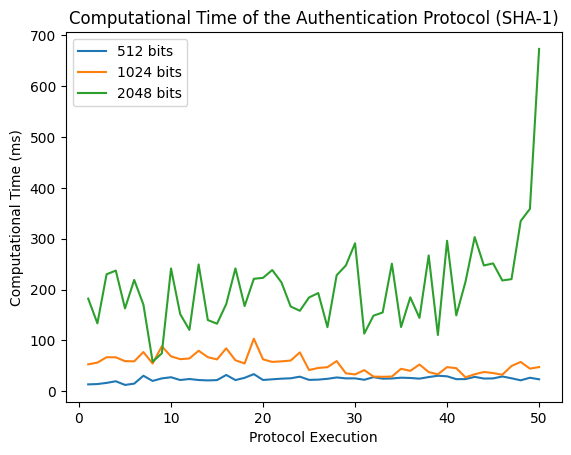

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self, key_size):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc, key_size):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity, key_size)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity, key_size)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity, key_size)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)


def plot_computational_time(x_values, y_values, key_sizes):
    for i, key_size in enumerate(key_sizes):
        plt.plot(x_values, y_values[i], label=f'{key_size} bits')

    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Authentication Protocol (SHA-1)')
    plt.legend()
    plt.show()


def main():
    key_sizes = [512, 1024, 2048]
    num_executions = 50

    x_values = list(range(1, num_executions + 1))
    y_values = [[] for _ in key_sizes]

    for i, key_size in enumerate(key_sizes):
        udc = UDC()
        for iteration in range(num_executions):
            execution_time = run_protocol(udc, key_size)
            y_values[i].append(execution_time)
            print(f"Iteration: {iteration + 1}, Key Size: {key_size} bits, Execution Time: {execution_time:.2f} ms")

    plot_computational_time(x_values, y_values, key_sizes)


if __name__ == '__main__':
    main()


***NOW, WE WILL BE USING SHA-256 INSTEAD OF THE SHA-1 (THATS ORIGINALLY USED IN THE PROTOCOL) AND SEE THE RESULTS.***

Iteration: 1, Key Size: 512 bits, Execution Time: 14.69 ms
Iteration: 2, Key Size: 512 bits, Execution Time: 14.17 ms
Iteration: 3, Key Size: 512 bits, Execution Time: 14.46 ms
Iteration: 4, Key Size: 512 bits, Execution Time: 12.89 ms
Iteration: 5, Key Size: 512 bits, Execution Time: 11.88 ms
Iteration: 6, Key Size: 512 bits, Execution Time: 13.96 ms
Iteration: 7, Key Size: 512 bits, Execution Time: 12.37 ms
Iteration: 8, Key Size: 512 bits, Execution Time: 20.00 ms
Iteration: 9, Key Size: 512 bits, Execution Time: 15.67 ms
Iteration: 10, Key Size: 512 bits, Execution Time: 14.38 ms
Iteration: 11, Key Size: 512 bits, Execution Time: 12.35 ms
Iteration: 12, Key Size: 512 bits, Execution Time: 14.24 ms
Iteration: 13, Key Size: 512 bits, Execution Time: 11.41 ms
Iteration: 14, Key Size: 512 bits, Execution Time: 13.11 ms
Iteration: 15, Key Size: 512 bits, Execution Time: 12.88 ms
Iteration: 16, Key Size: 512 bits, Execution Time: 18.33 ms
Iteration: 17, Key Size: 512 bits, Execution Time

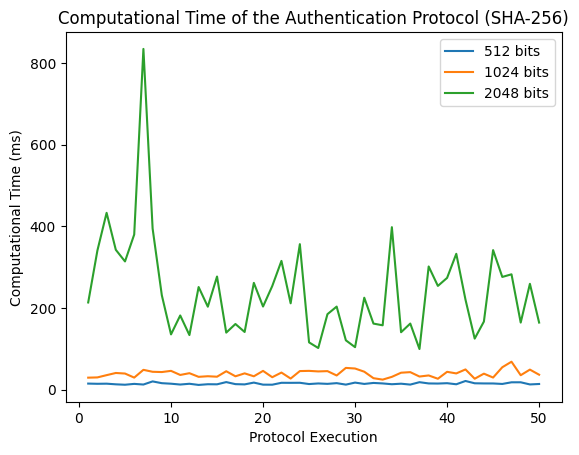

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha256(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self, key_size):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc, key_size):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity, key_size)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity, key_size)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity, key_size)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)


def plot_computational_time(x_values, y_values, key_sizes):
    for i, key_size in enumerate(key_sizes):
        plt.plot(x_values, y_values[i], label=f'{key_size} bits')

    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Authentication Protocol (SHA-256)')
    plt.legend()
    plt.show()


def main():
    key_sizes = [512, 1024, 2048]
    num_executions = 50

    x_values = list(range(1, num_executions + 1))
    y_values = [[] for _ in key_sizes]

    for i, key_size in enumerate(key_sizes):
        udc = UDC()
        for iteration in range(num_executions):
            execution_time = run_protocol(udc, key_size)
            y_values[i].append(execution_time)
            print(f"Iteration: {iteration + 1}, Key Size: {key_size} bits, Execution Time: {execution_time:.2f} ms")

    plot_computational_time(x_values, y_values, key_sizes)


if __name__ == '__main__':
    main()


# **FOR THE IMPLEMENTATION OF THE COMPLETE SECURITY PROTOCOL.**

Iteration: 1, Key Size: 512 bits, Execution Time: 17.42 ms
Iteration: 2, Key Size: 512 bits, Execution Time: 14.68 ms
Iteration: 3, Key Size: 512 bits, Execution Time: 16.89 ms
Iteration: 4, Key Size: 512 bits, Execution Time: 19.68 ms
Iteration: 5, Key Size: 512 bits, Execution Time: 12.49 ms
Iteration: 6, Key Size: 512 bits, Execution Time: 15.72 ms
Iteration: 7, Key Size: 512 bits, Execution Time: 12.29 ms
Iteration: 8, Key Size: 512 bits, Execution Time: 14.68 ms
Iteration: 9, Key Size: 512 bits, Execution Time: 14.03 ms
Iteration: 10, Key Size: 512 bits, Execution Time: 19.59 ms
Iteration: 11, Key Size: 512 bits, Execution Time: 13.25 ms
Iteration: 12, Key Size: 512 bits, Execution Time: 12.76 ms
Iteration: 13, Key Size: 512 bits, Execution Time: 14.07 ms
Iteration: 14, Key Size: 512 bits, Execution Time: 17.03 ms
Iteration: 15, Key Size: 512 bits, Execution Time: 15.51 ms
Iteration: 16, Key Size: 512 bits, Execution Time: 16.31 ms
Iteration: 17, Key Size: 512 bits, Execution Time

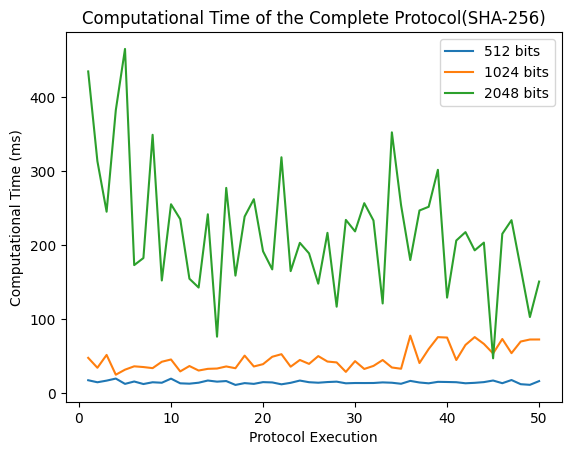

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self, key_size):
        self.key_size = key_size

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha256(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=self.key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)


def plot_computational_time(x_values, y_values, key_sizes):
    for i, key_size in enumerate(key_sizes):
        plt.plot(x_values, y_values[i], label=f'{key_size} bits')

    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Complete Protocol(SHA-256)')
    plt.legend()
    plt.show()


def main():
    num_executions = 50
    key_sizes = [512, 1024, 2048]
    x_values = list(range(1, num_executions + 1))
    y_values = [[] for _ in key_sizes]

    for i, key_size in enumerate(key_sizes):
        for iteration in range(num_executions):
            udc = UDC(key_size)
            execution_time = run_protocol(udc)
            y_values[i].append(execution_time)
            print(f"Iteration: {iteration + 1}, Key Size: {key_size} bits, Execution Time: {execution_time:.2f} ms")

    plot_computational_time(x_values, y_values, key_sizes)


if __name__ == '__main__':
    main()


**EFFECT OF THE EVs, CSs, RSUs Density on the Protocol:**

Iteration: 1, Key Size: 512 bits, Execution Time: 10.11 ms
Iteration: 2, Key Size: 512 bits, Execution Time: 9.65 ms
Iteration: 3, Key Size: 512 bits, Execution Time: 11.87 ms
Iteration: 4, Key Size: 512 bits, Execution Time: 9.42 ms
Iteration: 5, Key Size: 512 bits, Execution Time: 9.84 ms
Iteration: 6, Key Size: 512 bits, Execution Time: 10.10 ms
Iteration: 7, Key Size: 512 bits, Execution Time: 12.28 ms
Iteration: 8, Key Size: 512 bits, Execution Time: 10.41 ms
Iteration: 9, Key Size: 512 bits, Execution Time: 10.04 ms
Iteration: 10, Key Size: 512 bits, Execution Time: 9.39 ms
Iteration: 11, Key Size: 512 bits, Execution Time: 8.84 ms
Iteration: 12, Key Size: 512 bits, Execution Time: 10.97 ms
Iteration: 13, Key Size: 512 bits, Execution Time: 10.07 ms
Iteration: 14, Key Size: 512 bits, Execution Time: 10.61 ms
Iteration: 15, Key Size: 512 bits, Execution Time: 10.11 ms
Iteration: 16, Key Size: 512 bits, Execution Time: 9.24 ms
Iteration: 17, Key Size: 512 bits, Execution Time: 10.2

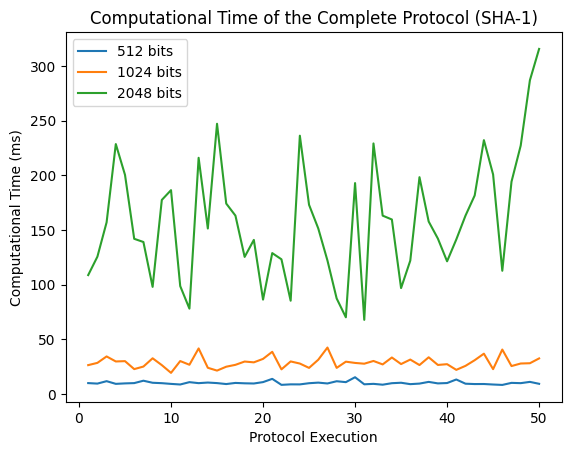

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity, key_size):
        private_key, public_key = self.generate_key_pair(key_size)
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self, key_size):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc, key_size, iteration):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity, key_size)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity, key_size)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity, key_size)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)



def plot_computational_time(x_values, y_values, key_sizes):
    for i, key_size in enumerate(key_sizes):
        plt.plot(x_values, y_values[i], label=f'{key_size} bits')

    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Complete Protocol (SHA-1)')
    plt.legend()
    plt.show()


def main():
    key_sizes = [512, 1024, 2048]
    num_executions = 50

    x_values = list(range(1, num_executions + 1))
    y_values = [[] for _ in key_sizes]

    for i, key_size in enumerate(key_sizes):
        udc = UDC()
        for iteration in range(num_executions):
            execution_time = run_protocol(udc, key_size, iteration)
            y_values[i].append(execution_time)
            print(f"Iteration: {iteration + 1}, Key Size: {key_size} bits, Execution Time: {execution_time:.2f} ms")
    plot_computational_time(x_values, y_values, key_sizes)


if __name__ == '__main__':
    main()


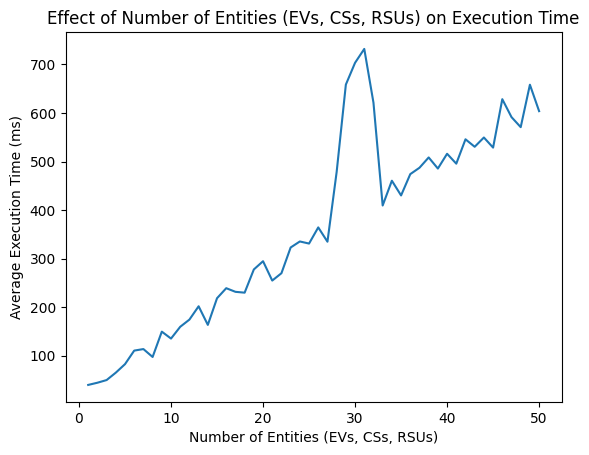

X-axis values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Y-axis values: [39.60227966308594, 44.11911964416504, 49.62658882141113, 64.89396095275879, 82.41724967956543, 110.32676696777344, 113.50035667419434, 97.20849990844727, 149.41835403442383, 135.12110710144043, 159.4078540802002, 174.2417812347412, 201.68828964233398, 163.32769393920898, 218.28889846801758, 238.95907402038574, 231.48250579833984, 229.72917556762695, 277.58193016052246, 294.56448554992676, 254.65679168701172, 269.8404788970947, 322.8440284729004, 335.2506160736084, 330.9328556060791, 364.246129989624, 334.75494384765625, 478.6531925201416, 658.5788726806641, 703.5098075866699, 732.0783138275146, 621.2611198425293, 409.36851501464844, 460.4601860046387, 430.0985336303711, 474.0447998046875, 487.1704578399658, 508.4071159362793, 485.52727699279785, 516.0021781921387, 49

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self, key_size):
        self.key_size = key_size

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha256(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha256(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=self.key_size
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc, num_evs):
    ev_identities = [f"EV{i+1}" for i in range(num_evs)]
    ev_public_keys = []
    ev_pseudo_identities = []

    # Registration process for EVs
    for ev_identity in ev_identities:
        ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
        ev_public_keys.append(ev_public_key)
        ev_pseudo_identities.append(ev_pseudo_identity)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = []
    for i in range(num_evs):
        auth_ev_udc.append(udc.calculate_auth_ev_udc(ev_public_keys[i], ev_pseudo_identities[i], t_ev))

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)


def plot_computational_time(x_values, y_values):
    plt.plot(x_values, y_values)
    plt.xlabel('Number of Entities (EVs, CSs, RSUs)')
    plt.ylabel('Average Execution Time (ms)')
    plt.title('Effect of Number of Entities (EVs, CSs, RSUs) on Execution Time')
    plt.show()


def main():
    num_executions = 1
    max_num_evs = 50
    x_values = list(range(1, max_num_evs + 1))
    y_values = []

    for num_evs in range(1, max_num_evs + 1):
        total_execution_time = 0

        for _ in range(num_executions):
            udc = UDC(1024)
            execution_time = run_protocol(udc, num_evs)
            total_execution_time += execution_time

        average_execution_time = total_execution_time / num_executions
        y_values.append(average_execution_time)

    plot_computational_time(x_values, y_values)

    # Output x and y axis values
    print("X-axis values:", x_values)
    print("Y-axis values:", y_values)


if __name__ == '__main__':
    main()


# **NOW FOR THE IMPLEMENTATION OF THE SELECTION ALGORITHMS:**

***BASELINE ALGORITHM USED IN BLOCKEV:*** We first implement the base paper selection algorithm then we will optimize it for cost ant the computational time of the algorithm. Below is the basic implementation of the optimization problem how it selects the best CS for the EV based upon the solving the linear programming problem. And further show the optimised cost it selected a particular CS.

In [ ]:
import random
from pulp import *

# Randomly generate data for 50 charging stations
M = 50  # Number of charging stations
B = 100  # EV's charging budget
Tmaxtrip = 60  # Maximum travel time
Tmaxchar = 120  # Maximum charging time
Tmaxwait = 30  # Maximum waiting time

charging_stations = range(1, M + 1)
EVs = range(1, 11)  # 10 different EVs

# Randomly generate data for each charging station
charging_costs = {m: random.uniform(0.5, 1.5) for m in charging_stations}
parking_costs = {m: random.uniform(0.1, 0.5) for m in charging_stations}
travel_times = {m: random.uniform(20, 60) for m in charging_stations}
charging_powers = {m: random.uniform(50, 150) for m in charging_stations}
waiting_times = {m: random.uniform(10, 20) for m in charging_stations}

# Create the LP problem
prob = LpProblem("EV Charging Optimization", LpMinimize)

# Decision variables
ym = LpVariable.dicts("ym", (EVs, charging_stations), None, 1, LpBinary)

# Objective function: Overall cost
Cmon = lpSum([ym[ev][m] * charging_costs[m] for ev in EVs for m in charging_stations])
Ctra = lpSum([ym[ev][m] * travel_times[m] for ev in EVs for m in charging_stations])
Cchar = lpSum([ym[ev][m] * charging_powers[m] for ev in EVs for m in charging_stations])
Cwait = lpSum([ym[ev][m] * waiting_times[m] for ev in EVs for m in charging_stations])

prob += Cmon + Ctra + Cchar + Cwait

# Constraints
for ev in EVs:
    prob += lpSum([ym[ev][m] for m in charging_stations]) == 1

for m in charging_stations:
    prob += lpSum([ym[ev][m] * charging_powers[m] + ym[ev][m] * parking_costs[m] for ev in EVs]) <= B
    prob += lpSum([ym[ev][m] * travel_times[m] for ev in EVs]) <= Tmaxtrip
    prob += lpSum([ym[ev][m] * charging_powers[m] for ev in EVs]) <= Tmaxchar
    prob += lpSum([ym[ev][m] * waiting_times[m] for ev in EVs]) <= Tmaxwait

# Solve the problem
prob.solve()

# Print the optimized cost and selected charging station for each EV
for ev in EVs:
    selected_cs = [m for m in charging_stations if ym[ev][m].varValue == 1]
    cost = 100*sum(ym[ev][m].varValue * charging_costs[m] for m in selected_cs)
    print("EV", ev, "Selected Charging Station(s):", selected_cs)
    print("Optimized Cost:", cost)




EV 1 Selected Charging Station(s): [28]
Optimized Cost: 114.34175109277842
EV 2 Selected Charging Station(s): [46]
Optimized Cost: 102.8913040904639
EV 3 Selected Charging Station(s): [2]
Optimized Cost: 134.99947807592417
EV 4 Selected Charging Station(s): [6]
Optimized Cost: 107.11277009629399
EV 5 Selected Charging Station(s): [14]
Optimized Cost: 72.93383304689955
EV 6 Selected Charging Station(s): [40]
Optimized Cost: 115.45431685872671
EV 7 Selected Charging Station(s): [30]
Optimized Cost: 81.7023886775464
EV 8 Selected Charging Station(s): [43]
Optimized Cost: 123.03111079660172
EV 9 Selected Charging Station(s): [38]
Optimized Cost: 51.68686029349138
EV 10 Selected Charging Station(s): [8]
Optimized Cost: 68.91208120151755


***Below is the Implementation of the Runtime Of the Algorithm as the Number of CA increases.***

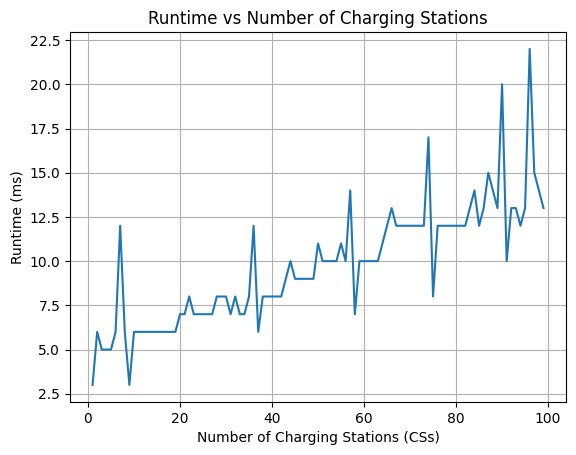

In [ ]:
import numpy as np
import random
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt

# Set the range of CSs
num_cs_range = range(1, 100)

# Create an empty list to store the runtimes
runtimes = []

# Iterate over the range of CSs
for num_cs in num_cs_range:
    # Randomly generate necessary data
    M = num_cs  # Total number of charging stations
    G = 1  # Number of EVs

    # Generate CS data
    charging_stations = []
    for i in range(M):
        charging_station = {
            'ID': f'CS{i+1}',
            'loc': (random.uniform(0, 10), random.uniform(0, 10)),  # Random location
            'Ts': random.uniform(0, 10),  # Start time of available charging slot
            'Te': random.uniform(10, 20),  # End time of available charging slot
            'alpha': random.uniform(1, 5),  # Charging power
            'Tw': random.uniform(10, 20),  # Estimated waiting time
            'Cm': random.uniform(0.1, 0.5),  # Charging cost per unit time
            'Cp': random.uniform(0.05, 0.25),  # Parking cost per unit time
            'RCs': random.uniform(0, 1)  # Reputation
        }
        charging_stations.append(charging_station)

    # Set additional assumptions and solver
    Tmaxtrip = 60  # Maximum travel time
    Tmaxchar = 120  # Maximum charging time
    Tmaxwait = 60  # Maximum waiting time
    WT = 0.1  # Weight for travel time cost conversion
    WC = 0.1  # Weight for charging time cost conversion
    WW = 0.1  # Weight for waiting time cost conversion
    Vs = 50  # Speed of EV (km/h)
    B = 100  # Maximum budget of EV

    # Create the solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Define decision variables, objective function, and constraints
    y = np.array([solver.IntVar(0, 1, f"y_{m+1}") for m in range(M)])  # Decision variables
    Tch = solver.NumVar(0, solver.infinity(), "Tch")  # Charging monetary cost variable

    # Objective function: Minimize the overall cost
    objective = solver.Objective()

    for m in range(M):
        Cm = charging_stations[m]['Cm']
        Cp = charging_stations[m]['Cp']
        objective.SetCoefficient(y[m], charging_stations[m]['Tw'] * WW)  # Traveling time cost
        objective.SetCoefficient(y[m], Cm + Cp)  # Charging monetary cost

    objective.SetCoefficient(Tch, 1)
    objective.SetMinimization()

    # Constraints
    for m in range(M):
        # Charging time constraint
        Cm = charging_stations[m]['Cm']
        Cp = charging_stations[m]['Cp']
        solver.Add(Tch <= B)

        # Traveling time constraint
        loc = charging_stations[m]['loc']
        dm = solver.NumVar(0, solver.infinity(), f"dm_{m+1}")
        solver.Add(dm <= Tmaxtrip)

        # Charging time constraint
        alpha = charging_stations[m]['alpha']
        Ttot = solver.NumVar(0, solver.infinity(), f"Ttot_{m+1}")
        solver.Add(Ttot <= Tmaxchar)

        # Waiting time constraint
        Tw = charging_stations[m]['Tw']
        Twait = solver.NumVar(0, solver.infinity(), f"Twait_{m+1}")
        solver.Add(Twait <= Tmaxwait)

        # Selection constraint
        solver.Add(y[m] == 1)

    # Solve the problem and measure runtime
    solver.Solve()
    runtime = solver.wall_time()  # Get the runtime in milliseconds
    runtimes.append(runtime)

# Plot the line graph
plt.plot(num_cs_range, runtimes)
plt.xlabel('Number of Charging Stations (CSs)')
plt.ylabel('Runtime (ms)')
plt.title('Runtime vs Number of Charging Stations')
plt.grid(True)
plt.show()


Now we have the Price optimised as the number of CS increases. It is decreases as after some CS increment the saturation will reached.

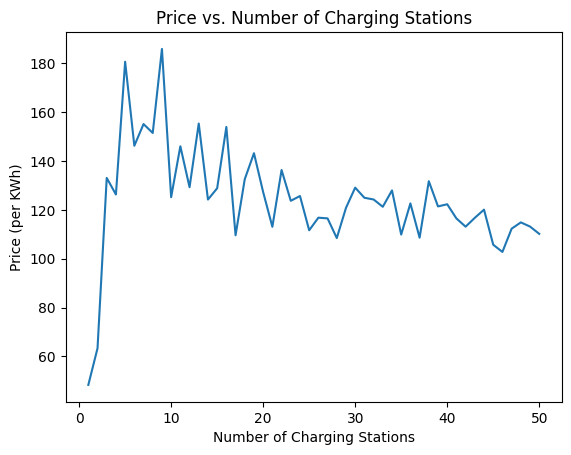

X-axis values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Y-axis values: [48.30312304199155, 63.325374151033074, 133.10423812396655, 126.31801902093916, 180.71252616431622, 146.28341722827466, 155.16182612821586, 151.52827969329525, 185.95128963407296, 125.20683067635147, 146.06130073626147, 129.29879213245755, 155.38190807726937, 124.23909452535793, 128.8645808829227, 153.99564871448757, 109.60897647636818, 132.5912878731178, 143.22931276608767, 127.28304133978054, 113.08551489182025, 136.35074908375776, 123.72737458972617, 125.69823821829104, 111.65978227010842, 116.81677720763051, 116.52553575109724, 108.46455395716218, 120.83565388653479, 129.1207040811629, 124.97334684308949, 124.27512224054792, 121.28635734636097, 127.98663418062863, 109.89490854024423, 122.67105678428979, 108.62131155393857, 131.76392588449397, 121.42944140339173, 1

In [ ]:
import random
import matplotlib.pyplot as plt
from pulp import *

# Define the range of CS values
cs_values = range(1, 51)  # Number of charging stations from 1 to 50

# Lists to store the optimized prices and x-axis values
optimized_prices = []
x_axis_values = []

for cs in cs_values:
    # Randomly generate data for the current number of charging stations
    charging_stations = range(1, cs + 1)
    EVs = range(1, 11)  # 10 different EVs

    # Randomly generate data for each charging station
    charging_costs = {m: random.uniform(0.5, 1.5) for m in charging_stations}
    parking_costs = {m: random.uniform(0.1, 0.5) for m in charging_stations}
    travel_times = {m: random.uniform(20, 60) for m in charging_stations}
    charging_powers = {m: random.uniform(50, 150) for m in charging_stations}
    waiting_times = {m: random.uniform(10, 20) for m in charging_stations}

    # Randomly generate values for maximum constraints
    B = random.uniform(50, 150)  # Maximum charging budget
    Tmaxtrip = random.uniform(30, 90)  # Maximum travel time
    Tmaxchar = random.uniform(60, 180)  # Maximum charging time
    Tmaxwait = random.uniform(15, 45)  # Maximum waiting time

    # Create the LP problem
    prob = LpProblem("EV Charging Optimization", LpMinimize)

    # Decision variables
    ym = LpVariable.dicts("ym", (EVs, charging_stations), None, 1, LpBinary)

    # Objective function: Overall cost
    Cmon = lpSum([ym[ev][m] * charging_costs[m] for ev in EVs for m in charging_stations])
    Ctra = lpSum([ym[ev][m] * travel_times[m] for ev in EVs for m in charging_stations])
    Cchar = lpSum([ym[ev][m] * charging_powers[m] for ev in EVs for m in charging_stations])
    Cwait = lpSum([ym[ev][m] * waiting_times[m] for ev in EVs for m in charging_stations])

    prob += Cmon + Ctra + Cchar + Cwait

    # Constraints
    for ev in EVs:
        prob += lpSum([ym[ev][m] for m in charging_stations]) == 1

    for m in charging_stations:
        prob += lpSum([ym[ev][m] * charging_powers[m] + ym[ev][m] * parking_costs[m] for ev in EVs]) <= B
        prob += lpSum([ym[ev][m] * travel_times[m] for ev in EVs]) <= Tmaxtrip
        prob += lpSum([ym[ev][m] * charging_powers[m] for ev in EVs]) <= Tmaxchar
        prob += lpSum([ym[ev][m] * waiting_times[m] for ev in EVs]) <= Tmaxwait

    # Solve the problem
    prob.solve()

    # Find the optimized price (objective value)
    optimized_price = value(prob.objective)/10
    optimized_prices.append(optimized_price)
    x_axis_values.append(cs)

# Plot the graph
plt.plot(x_axis_values, optimized_prices)
plt.xlabel('Number of Charging Stations')
plt.ylabel('Price (per KWh)')
plt.title('Price vs. Number of Charging Stations')
plt.show()

# Print the x and y axis values
print("X-axis values:", x_axis_values)
print("Y-axis values:", optimized_prices)


***MODIFIED ALGORITHM WITH THE OPTIMIZATION CHANGES:***

In [ ]:
from pulp import *
import random

# Define the data
G = 20  # Number of EVs
M = 5  # Number of CSs

# Initialize lists to store selected CSs and optimization values for each EV
selected_CSs = []
optimization_values = []

# Solve the optimization problem for each EV
for g in range(1, G + 1):
    # Reset the problem
    problem = LpProblem("Charging Station Selection Problem", LpMinimize)

    # Generate random data for EV
    random.seed(g)  # Set the random seed for EVs using EV index
    EV = {
        'ID': f'EV{g}',
        'Vs': 50,  # Speed of EV (km/h)
        'SoCcur': random.uniform(10, 50),  # Random current state of charge
        'SoCdes': random.uniform(60, 100),  # Random desired state of charge
        'B': random.uniform(50, 200),  # Random maximum budget
        'alpha': random.uniform(5, 15)  # Random charging power at the CS
    }

    # Generate random data for CS
    random.seed(g)  # Set the same random seed for CSs using EV index
    CS = {}
    for i in range(1, M + 1):
        CS[i] = {
            "ID": f"CS{i}",
            "loc": random.randint(1, 100),
            "Ts": random.randint(0, 12),
            "Te": random.randint(13, 24),
            "Tw": random.randint(10, 20),
            "Cm": random.uniform(0.1, 0.2),  # Charging cost per kilowatt-hour (kWh)
            "Cp": random.uniform(1, 2),
            "RCS": random.uniform(1, 10)
        }

    # Define the decision variables and objective function
    X = LpVariable.dicts("X", [(g, i) for i in range(1, M + 1)], cat="Binary")
    Cmon = LpVariable("Cmon")
    Ctra = LpVariable("Ctra")
    Cchar = LpVariable("Cchar")
    Cwait = LpVariable("Cwait")
    C = Cmon + Ctra + Cchar + Cwait
    problem += C

    # Add the constraints
    problem += lpSum(X[g, i] for i in range(1, M + 1)) == 1  # Select exactly one charging station for each EV
    problem += lpSum(X[g, i] * (CS[i]["Cm"] + CS[i]["Cp"]) for i in range(1, M + 1)) <= EV['B']  # Charging monetary cost constraint

    # Define the objective function components
    problem += Cmon == lpSum(X[g, i] * CS[i]["Cm"] for i in range(1, M + 1))  # Charging monetary cost
    problem += Ctra == EV['Vs'] * lpSum(X[g, i] * CS[i]["loc"] for i in range(1, M + 1))  # Traveling time cost
    problem += Cchar == 0.1 * ((EV['SoCdes'] - EV['SoCcur']) / EV['alpha'])  # Charging time cost
    problem += Cwait == 0.1 * lpSum(X[g, i] * CS[i]["Tw"] for i in range(1, M + 1))  # Waiting time cost

    # Solve the problem
    problem.solve()

    # Get the selected charging station for the EV
    selected_CS = None
    for i in range(1, M + 1):
        if value(X[g, i]) == 1:
            selected_CS = CS[i]
            break
    selected_CSs.append(selected_CS)

    # Store the optimization value
    optimization_values.append(value(problem.objective))

# Print the selected charging station and optimization value for each EV
for g, selected_CS in enumerate(selected_CSs, start=1):
    print(f"EV{g} selected {selected_CS['ID']} with optimization value: {optimization_values[g-1]/10}")



EV1 selected CS4 with optimization value: 70.214248629
EV2 selected CS1 with optimization value: 40.25328251
EV3 selected CS2 with optimization value: 45.238984023
EV4 selected CS3 with optimization value: 70.186513031
EV5 selected CS4 with optimization value: 265.209556041
EV6 selected CS5 with optimization value: 60.221604324
EV7 selected CS3 with optimization value: 60.193526951
EV8 selected CS5 with optimization value: 45.236998978
EV9 selected CS4 with optimization value: 35.232679993
EV10 selected CS2 with optimization value: 180.177945073
EV11 selected CS5 with optimization value: 40.202223292
EV12 selected CS4 with optimization value: 135.22994006
EV13 selected CS4 with optimization value: 10.178403933999999
EV14 selected CS1 with optimization value: 70.26652960300001
EV15 selected CS1 with optimization value: 135.129598779
EV16 selected CS4 with optimization value: 165.264511824
EV17 selected CS3 with optimization value: 325.296206821
EV18 selected CS1 with optimization value:

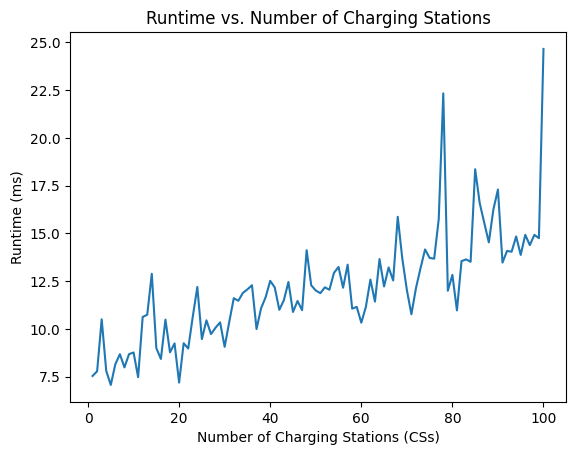

In [ ]:
from pulp import *
import random
import time
import matplotlib.pyplot as plt

# Define the data
G = 1  # Number of EVs
max_num_CS =  100 # Maximum number of charging stations

# Initialize lists to store runtimes and minimized costs
runtimes = []
minimized_costs = []

# Vary the number of charging stations
for M in range(1, max_num_CS + 1):
    # Reset the problem
    problem = LpProblem("Charging Station Selection Problem", LpMinimize)

    # Generate random data for EV and CS
    random.seed()
    EV = {
        'ID': 'EV1',
        'Vs': 50,  # Speed of EV (km/h)
        'SoCcur': random.uniform(10, 50),  # Random current state of charge
        'SoCdes': random.uniform(60, 100),  # Random desired state of charge
        'B': random.uniform(50, 200),  # Random maximum budget
        'alpha': random.uniform(5, 15)  # Random charging power at the CS
    }

    CS = {}
    for i in range(1, M + 1):
        CS[i] = {
            "ID": f"CS{i}",
            "loc": random.randint(1, 100),
            "Ts": random.randint(0, 12),
            "Te": random.randint(13, 24),
            "Tw": random.randint(10, 20),
            "Cm": random.uniform(1, 2),
            "Cp": random.uniform(1, 2),
            "RCS": random.uniform(1, 10)
        }

    # Define the decision variables and objective function
    X = LpVariable.dicts("X", [(g, i) for g in range(1, G + 1) for i in range(1, M + 1)], cat="Binary")
    Cmon = LpVariable("Cmon")
    Ctra = LpVariable("Ctra")
    Cchar = LpVariable("Cchar")
    Cwait = LpVariable("Cwait")
    C = Cmon + Ctra + Cchar + Cwait
    problem += C

    # Add the constraints
    for g in range(1, G + 1):
        problem += lpSum(X[g, i] for i in range(1, M + 1)) == 1  # Select exactly one charging station for each EV

    for g in range(1, G + 1):
        problem += lpSum(X[g, i] * (CS[i]["Cm"] + CS[i]["Cp"]) for i in range(1, M + 1)) <= EV['B']  # Charging monetary cost constraint

    problem += Cmon == lpSum(X[g, i] * CS[i]["Cm"] for g in range(1, G + 1) for i in range(1, M + 1))  # Charging monetary cost
    problem += Ctra == EV['Vs'] * lpSum(X[g, i] * CS[i]["loc"] for g in range(1, G + 1) for i in range(1, M + 1))  # Traveling time cost
    problem += Cchar == 0.1 * ((EV['SoCdes'] - EV['SoCcur']) / EV['alpha'])  # Charging time cost
    problem += Cwait == 0.1 * lpSum(X[g, i] * CS[i]["Tw"] for g in range(1, G + 1) for i in range(1, M + 1))  # Waiting time cost

    # Solve the problem and measure runtime
    start_time = time.time()
    problem.solve()
    end_time = time.time()

    # Check the status of the solution
    status = LpStatus[problem.status]

    # Store the runtime in milliseconds
    runtime_ms = (end_time - start_time) * 1000
    runtimes.append(runtime_ms)

# Plot the graph of runtime vs. number of charging stations
plt.plot(range(1, max_num_CS + 1), runtimes)
plt.xlabel('Number of Charging Stations (CSs)')
plt.ylabel('Runtime (ms)')
plt.title('Runtime vs. Number of Charging Stations')
plt.show()


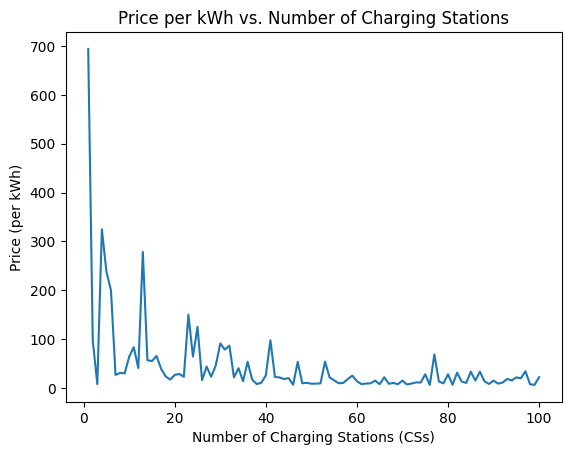

In [ ]:
from pulp import *
import random
import matplotlib.pyplot as plt

# Define the data
G = 1  # Number of EVs
max_num_CS = 100  # Maximum number of charging stations

# Initialize lists to store prices
prices = []

# Vary the number of charging stations
for M in range(1, max_num_CS + 1):
    # Reset the problem
    problem = LpProblem("Charging Station Selection Problem", LpMinimize)

    # Generate random data for EV and CS
    random.seed()
    EV = {
        'ID': 'EV1',
        'Vs': 50,  # Speed of EV (km/h)
        'SoCcur': random.uniform(10, 50),  # Random current state of charge
        'SoCdes': random.uniform(60, 100),  # Random desired state of charge
        'B': random.uniform(50, 200),  # Random maximum budget
        'alpha': random.uniform(5, 15)  # Random charging power at the CS
    }

    CS = {}
    for i in range(1, M + 1):
        CS[i] = {
            "ID": f"CS{i}",
            "loc": random.randint(1, 100),
            "Ts": random.randint(0, 12),
            "Te": random.randint(13, 24),
            "Tw": random.randint(10, 20),
            "Cm": random.uniform(0.1, 0.2),  # Charging cost per kilowatt-hour (kWh)
            "Cp": random.uniform(1, 2),
            "RCS": random.uniform(1, 10)
        }

    # Define the decision variables and objective function
    X = LpVariable.dicts("X", [(g, i) for g in range(1, G + 1) for i in range(1, M + 1)], cat="Binary")
    Cmon = LpVariable("Cmon")
    Ctra = LpVariable("Ctra")
    Cchar = LpVariable("Cchar")
    Cwait = LpVariable("Cwait")
    C = Cmon + Ctra + Cchar + Cwait
    problem += C

    # Add the constraints
    for g in range(1, G + 1):
        problem += lpSum(X[g, i] for i in range(1, M + 1)) == 1  # Select exactly one charging station for each EV

    for g in range(1, G + 1):
        problem += lpSum(X[g, i] * (CS[i]["Cm"] + CS[i]["Cp"]) for i in range(1, M + 1)) <= EV['B']  # Charging monetary cost constraint

    problem += Cmon == lpSum(X[g, i] * CS[i]["Cm"] for g in range(1, G + 1) for i in range(1, M + 1))  # Charging monetary cost
    problem += Ctra == EV['Vs'] * lpSum(X[g, i] * CS[i]["loc"] for g in range(1, G + 1) for i in range(1, M + 1))  # Traveling time cost
    problem += Cchar == 0.1 * ((EV['SoCdes'] - EV['SoCcur']) / EV['alpha'])  # Charging time cost
    problem += Cwait == 0.1 * lpSum(X[g, i] * CS[i]["Tw"] for g in range(1, G + 1) for i in range(1, M + 1))  # Waiting time cost

    # Solve the problem
    problem.solve()

    # Record the price per kilowatt-hour (kWh)
    price_per_kWh = value(problem.objective) / (EV['SoCdes'] - EV['SoCcur'])
    prices.append(price_per_kWh*10)

# Plot the graph of price per kilowatt-hour (kWh) vs. number of charging stations
plt.plot(range(1, max_num_CS + 1), prices)
plt.xlabel('Number of Charging Stations (CSs)')
plt.ylabel('Price (per kWh)')
plt.title('Price per kWh vs. Number of Charging Stations')
plt.show()


EV1 selected 4 with optimization value: 702.14248629
EV2 selected 1 with optimization value: 402.53282509999997
EV3 selected 10 with optimization value: 202.73346137000001
EV4 selected 3 with optimization value: 701.86513031
EV5 selected 6 with optimization value: 1401.9109651300002
EV6 selected 5 with optimization value: 602.21604324
EV7 selected 3 with optimization value: 601.93526951
EV8 selected 5 with optimization value: 452.36998978
EV9 selected 4 with optimization value: 352.32679993
EV10 selected 6 with optimization value: 902.5639983499999
EV11 selected 10 with optimization value: 51.70926984
EV12 selected 4 with optimization value: 1352.2994006
EV13 selected 4 with optimization value: 101.78403933999999
EV14 selected 7 with optimization value: 651.7704628800001
EV15 selected 7 with optimization value: 152.09740597
EV16 selected 6 with optimization value: 602.33005066
EV17 selected 9 with optimization value: 1552.2731746499999
EV18 selected 1 with optimization value: 1202.8250

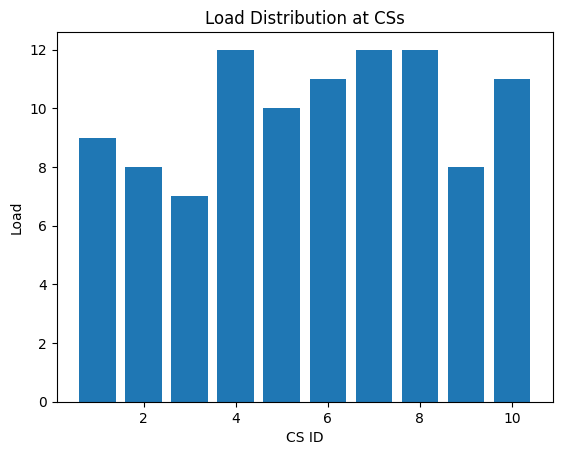

In [ ]:
from pulp import *
import random
import matplotlib.pyplot as plt

# Define the data
G = 100  # Number of EVs
M = 10  # Number of CSs

# Initialize lists to store selected CSs and optimization values for each EV
selected_CSs = []
optimization_values = []

# Solve the optimization problem for each EV
for g in range(1, G + 1):
    # Reset the problem
    problem = LpProblem("Charging Station Selection Problem", LpMinimize)

    # Generate random data for EV
    random.seed(g)  # Set the random seed for EVs using EV index
    EV = {
        'ID': f'EV{g}',
        'Vs': 50,  # Speed of EV (km/h)
        'SoCcur': random.uniform(10, 50),  # Random current state of charge
        'SoCdes': random.uniform(60, 100),  # Random desired state of charge
        'B': random.uniform(50, 200),  # Random maximum budget
        'alpha': random.uniform(5, 15)  # Random charging power at the CS
    }

    # Generate random data for CS
    random.seed(g)  # Set the random seed for CSs using EV index
    CS = {}
    for i in range(1, M + 1):
        CS[i] = {
            "ID": i,
            "loc": random.randint(1, 100),
            "Ts": random.randint(0, 12),
            "Te": random.randint(13, 24),
            "Tw": random.randint(10, 20),
            "Cm": random.uniform(0.1, 0.2),  # Charging cost per kilowatt-hour (kWh)
            "Cp": random.uniform(1, 2),
            "RCS": random.uniform(1, 10)
        }

    # Define the decision variables and objective function
    X = LpVariable.dicts("X", [(g, i) for i in range(1, M + 1)], cat="Binary")
    Cmon = LpVariable("Cmon")
    Ctra = LpVariable("Ctra")
    Cchar = LpVariable("Cchar")
    Cwait = LpVariable("Cwait")
    C = Cmon + Ctra + Cchar + Cwait
    problem += C

    # Add the constraints
    problem += lpSum(X[g, i] for i in range(1, M + 1)) == 1  # Select exactly one charging station for each EV
    problem += lpSum(X[g, i] * (CS[i]["Cm"] + CS[i]["Cp"]) for i in range(1, M + 1)) <= EV['B']  # Charging monetary cost constraint

    # Define the objective function components
    problem += Cmon == lpSum(X[g, i] * CS[i]["Cm"] for i in range(1, M + 1))  # Charging monetary cost
    problem += Ctra == EV['Vs'] * lpSum(X[g, i] * CS[i]["loc"] for i in range(1, M + 1))  # Traveling time cost
    problem += Cchar == 0.1 * ((EV['SoCdes'] - EV['SoCcur']) / EV['alpha'])  # Charging time cost
    problem += Cwait == 0.1 * lpSum(X[g, i] * CS[i]["Tw"] for i in range(1, M + 1))  # Waiting time cost

    # Solve the problem
    problem.solve()

    # Get the selected charging station for the EV
    selected_CS = None
    for i in range(1, M + 1):
        if value(X[g, i]) == 1:
            selected_CS = CS[i]
            break
    selected_CSs.append(selected_CS)

    # Store the optimization value
    optimization_values.append(value(problem.objective))

# Print the selected charging station and optimization value for each EV
for g, selected_CS in enumerate(selected_CSs, start=1):
    print(f"EV{g} selected {selected_CS['ID']} with optimization value: {optimization_values[g-1]}")

# Calculate the load at each CS
load_at_CS = [0] * M
for selected_CS in selected_CSs:
    load_at_CS[selected_CS["ID"] - 1] += 1

# Plot the histogram of load at CSs
plt.bar(range(1, M + 1), load_at_CS)
plt.xlabel('CS ID')
plt.ylabel('Load')
plt.title('Load Distribution at CSs')
plt.show()


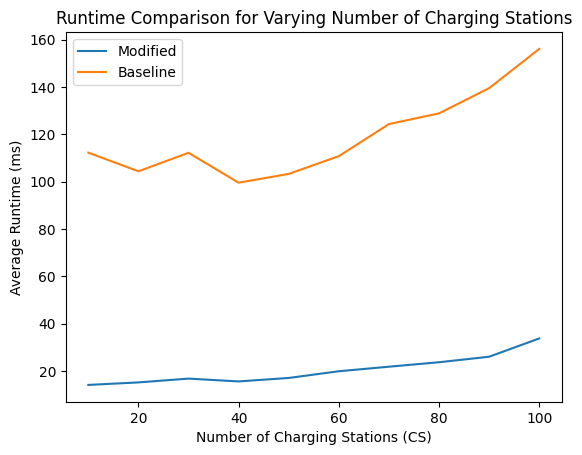

In [ ]:
import numpy as np
import random
from ortools.linear_solver import pywraplp
from pulp import *
import time
import matplotlib.pyplot as plt

def algorithm1(num_cs):
    # Randomly generate necessary data
    M = num_cs  # Total number of charging stations
    G = 1  # Number of EVs

    # Generate CS data
    charging_stations = []
    for i in range(M):
        charging_station = {
            'ID': f'CS{i+1}',
            'loc': (random.uniform(0, 10), random.uniform(0, 10)),  # Random location
            'Ts': random.uniform(0, 10),  # Start time of available charging slot
            'Te': random.uniform(10, 20),  # End time of available charging slot
            'alpha': random.uniform(1, 5),  # Charging power
            'Tw': random.uniform(10, 20),  # Estimated waiting time
            'Cm': random.uniform(0.1, 0.5),  # Charging cost per unit time
            'Cp': random.uniform(0.05, 0.25),  # Parking cost per unit time
            'RCs': random.uniform(0, 1)  # Reputation
        }
        charging_stations.append(charging_station)

    # Set additional assumptions and solver
    Tmaxtrip = 60  # Maximum travel time
    Tmaxchar = 120  # Maximum charging time
    Tmaxwait = 60  # Maximum waiting time
    WT = 0.1  # Weight for travel time cost conversion
    WC = 0.1  # Weight for charging time cost conversion
    WW = 0.1  # Weight for waiting time cost conversion
    Vs = 50  # Speed of EV (km/h)
    B = 100  # Maximum budget of EV

    # Create the solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Define decision variables, objective function, and constraints
    y = np.array([solver.IntVar(0, 1, f"y_{m+1}") for m in range(M)])  # Decision variables
    Tch = solver.NumVar(0, solver.infinity(), "Tch")  # Charging monetary cost variable

    # Objective function: Minimize the overall cost
    objective = solver.Objective()

    for m in range(M):
        Cm = charging_stations[m]['Cm']
        Cp = charging_stations[m]['Cp']
        objective.SetCoefficient(y[m], charging_stations[m]['Tw'] * WW)  # Traveling time cost
        objective.SetCoefficient(y[m], Cm + Cp)  # Charging monetary cost

    objective.SetCoefficient(Tch, 1)
    objective.SetMinimization()

    # Constraints
    for m in range(M):
        # Charging time constraint
        Cm = charging_stations[m]['Cm']
        Cp = charging_stations[m]['Cp']
        solver.Add(Tch <= B)

        # Traveling time constraint
        loc = charging_stations[m]['loc']
        dm = solver.NumVar(0, solver.infinity(), f"dm_{m+1}")
        solver.Add(dm <= Tmaxtrip)

        # Charging time constraint
        alpha = charging_stations[m]['alpha']
        Ttot = solver.NumVar(0, solver.infinity(), f"Ttot_{m+1}")
        solver.Add(Ttot <= Tmaxchar)

        # Waiting time constraint
        Tw = charging_stations[m]['Tw']
        Twait = solver.NumVar(0, solver.infinity(), f"Twait_{m+1}")
        solver.Add(Twait <= Tmaxwait)

        # Selection constraint
        solver.Add(y[m] == 1)

    # Solve the problem and measure runtime
    start_time = time.time()
    solver.Solve()
    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

def algorithm2(num_cs):
    # Define the problem
    problem = LpProblem("Charging Station Selection Problem", LpMinimize)

    # Define the data
    M = num_cs  # Total number of charging stations
    G = 1  # Number of EVs

    # Random data for EV and CS
    SOCdes = 50  # Desired state of charge
    SOCcur = 20  # Current state of charge
    alpha = 10  # Charging power at the CS
    WT = Ww = WC = 0.1  # Weight conversion factors
    B = 100  # Maximum budget of the EV

    # Generate random data for CSs
    random.seed(0)
    CS = {}
    for i in range(1, M+1):
        CS[i] = {
            "ID": f"CS{i}",
            "loc": random.randint(1, 100),
            "Ts": random.randint(0, 12),
            "Te": random.randint(13, 24),
            "Tw": random.randint(10, 20),
            "Cm": random.uniform(1, 3),
            "Cp": random.uniform(1, 3),
            "RC S": random.uniform(0.6, 0.9)
        }

    # Define the decision variables
    X = LpVariable.dicts("X", [(g, i) for g in range(1, G+1) for i in range(1, M+1)], cat="Binary")

    # Define the objective function
    Cmon = LpVariable("Cmon")
    Ctra = LpVariable("Ctra")
    Cchar = LpVariable("Cchar")
    Cwait = LpVariable("Cwait")
    C = Cmon + Ctra + Cchar + Cwait
    problem += C

    # Add the constraints
    for g in range(1, G+1):
        problem += lpSum(X[g, i] for i in range(1, M+1)) == 1  # Select exactly one charging station for each EV

    for g in range(1, G+1):
        problem += lpSum(X[g, i] * (CS[i]["Cm"] + CS[i]["Cp"]) for i in range(1, M+1)) <= B  # Charging monetary cost constraint

    # Define the objective function components
    problem += Cmon == lpSum(X[g, i] * CS[i]["Cm"] for g in range(1, G+1) for i in range(1, M+1))  # Charging monetary cost
    problem += Ctra == WT * lpSum(X[g, i] * CS[i]["loc"] for g in range(1, G+1) for i in range(1, M+1))  # Traveling time cost
    problem += Cchar == WC * ((SOCdes - SOCcur) / alpha)  # Charging time cost
    problem += Cwait == Ww * lpSum(X[g, i] * CS[i]["Tw"] for g in range(1, G+1) for i in range(1, M+1))  # Waiting time cost

    # Solve the problem and measure runtime
    start_time = time.time()
    problem.solve()
    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds

    return runtime

# Main code
num_cs_values = range(10, 101, 10)  # Varying number of charging stations

algorithm1_runtimes = []
algorithm2_runtimes = []

num_runs = 50
for num_cs in num_cs_values:
    algorithm1_total_runtime = 0
    algorithm2_total_runtime = 0

    for _ in range(num_runs):
        algorithm1_runtime = algorithm1(num_cs)
        algorithm1_total_runtime += algorithm1_runtime

        algorithm2_runtime = algorithm2(num_cs)
        algorithm2_total_runtime += algorithm2_runtime

    algorithm1_avg_runtime = 10*algorithm1_total_runtime / num_runs
    algorithm2_avg_runtime = 10*algorithm2_total_runtime / num_runs

    algorithm1_runtimes.append(algorithm1_avg_runtime)
    algorithm2_runtimes.append(algorithm2_avg_runtime)

# Plotting the runtimes
plt.plot(num_cs_values, algorithm1_runtimes, label='Modified')
plt.plot(num_cs_values, algorithm2_runtimes, label='Baseline')
plt.xlabel('Number of Charging Stations (CS)')
plt.ylabel('Average Runtime (ms)')
plt.title('Runtime Comparison for Varying Number of Charging Stations')
plt.legend()
plt.show()


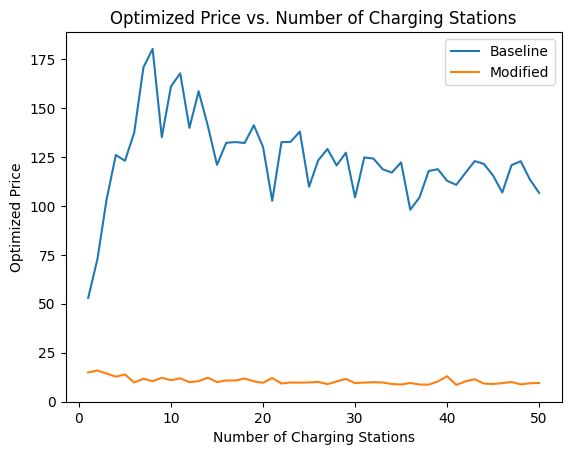

X-axis (Number of Charging Stations): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Y-axis (Optimized Price - Baseline): [53.01425146997875, 72.73941160862955, 103.26830472116777, 125.9360485347142, 123.01513921316447, 137.4128040029281, 170.6528051761448, 180.11509591869964, 135.1117268538515, 161.04070894463555, 167.66408098142765, 139.81153946256958, 158.48939507096506, 140.85610621100818, 120.91658892188438, 132.18974777513037, 132.56849136175623, 132.07068017372592, 141.10979551675436, 130.08089117693316, 102.60031421625897, 132.5010804032109, 132.6782491447479, 137.9169875696157, 109.75325201102308, 123.27227059287031, 129.02805404445556, 120.63392307123317, 127.13294643012246, 104.31821110890628, 124.71934788206741, 124.11571247192856, 118.66595099899295, 116.97988982842494, 122.21102063600821, 98.0159942508298, 104.27627647340019, 117

In [ ]:
import random
import matplotlib.pyplot as plt
from pulp import *

# Define the range of CS values
cs_values = range(1, 51)  # Number of charging stations from 1 to 100

# Lists to store the optimized prices
baseline_prices = []
modified_prices = []

for cs in cs_values:
    # Baseline Code - Randomly generate data and solve the problem
    charging_stations_baseline = range(1, cs + 1)
    EVs_baseline = range(1, 11)  # 10 different EVs

    charging_costs_baseline = {m: random.uniform(0.5, 1.5) for m in charging_stations_baseline}
    parking_costs_baseline = {m: random.uniform(0.1, 0.5) for m in charging_stations_baseline}
    travel_times_baseline = {m: random.uniform(20, 60) for m in charging_stations_baseline}
    charging_powers_baseline = {m: random.uniform(50, 150) for m in charging_stations_baseline}
    waiting_times_baseline = {m: random.uniform(10, 20) for m in charging_stations_baseline}
    B_baseline = random.uniform(50, 150)
    Tmaxtrip_baseline = random.uniform(30, 90)
    Tmaxchar_baseline = random.uniform(60, 180)
    Tmaxwait_baseline = random.uniform(15, 45)

    prob_baseline = LpProblem("EV Charging Optimization (Baseline)", LpMinimize)

    ym_baseline = LpVariable.dicts("ym", (EVs_baseline, charging_stations_baseline), None, 1, LpBinary)

    Cmon_baseline = lpSum([ym_baseline[ev][m] * charging_costs_baseline[m] for ev in EVs_baseline for m in charging_stations_baseline])
    Ctra_baseline = lpSum([ym_baseline[ev][m] * travel_times_baseline[m] for ev in EVs_baseline for m in charging_stations_baseline])
    Cchar_baseline = lpSum([ym_baseline[ev][m] * charging_powers_baseline[m] for ev in EVs_baseline for m in charging_stations_baseline])
    Cwait_baseline = lpSum([ym_baseline[ev][m] * waiting_times_baseline[m] for ev in EVs_baseline for m in charging_stations_baseline])

    prob_baseline += Cmon_baseline + Ctra_baseline + Cchar_baseline + Cwait_baseline

    for ev in EVs_baseline:
        prob_baseline += lpSum([ym_baseline[ev][m] for m in charging_stations_baseline]) == 1

    for m in charging_stations_baseline:
        prob_baseline += lpSum([ym_baseline[ev][m] * charging_powers_baseline[m] + ym_baseline[ev][m] * parking_costs_baseline[m] for ev in EVs_baseline]) <= B_baseline
        prob_baseline += lpSum([ym_baseline[ev][m] * travel_times_baseline[m] for ev in EVs_baseline]) <= Tmaxtrip_baseline
        prob_baseline += lpSum([ym_baseline[ev][m] * charging_powers_baseline[m] for ev in EVs_baseline]) <= Tmaxchar_baseline
        prob_baseline += lpSum([ym_baseline[ev][m] * waiting_times_baseline[m] for ev in EVs_baseline]) <= Tmaxwait_baseline

    prob_baseline.solve()

    optimized_price_baseline = value(prob_baseline.objective)/10
    baseline_prices.append(optimized_price_baseline)

    # Modified Code - Randomly generate data and solve the problem
    charging_stations_modified = range(1, cs + 1)
    EVs_modified = range(1, 2)  # 1 EV in the Modified code

    charging_costs_modified = {m: random.uniform(0.5, 1.5) for m in charging_stations_modified}
    parking_costs_modified = {m: random.uniform(0.1, 0.5) for m in charging_stations_modified}
    travel_times_modified = {m: random.uniform(20, 60) for m in charging_stations_modified}
    charging_powers_modified = {m: random.uniform(50, 150) for m in charging_stations_modified}
    waiting_times_modified = {m: random.uniform(10, 20) for m in charging_stations_modified}
    B_modified = random.uniform(50, 150)
    Tmaxtrip_modified = random.uniform(30, 90)
    Tmaxchar_modified = random.uniform(60, 180)
    Tmaxwait_modified = random.uniform(15, 45)

    prob_modified = LpProblem("EV Charging Optimization (Modified)", LpMinimize)

    ym_modified = LpVariable.dicts("ym", (EVs_modified, charging_stations_modified), None, 1, LpBinary)

    Cmon_modified = lpSum([ym_modified[ev][m] * charging_costs_modified[m] for ev in EVs_modified for m in charging_stations_modified])
    Ctra_modified = lpSum([ym_modified[ev][m] * travel_times_modified[m] for ev in EVs_modified for m in charging_stations_modified])
    Cchar_modified = lpSum([ym_modified[ev][m] * charging_powers_modified[m] for ev in EVs_modified for m in charging_stations_modified])
    Cwait_modified = lpSum([ym_modified[ev][m] * waiting_times_modified[m] for ev in EVs_modified for m in charging_stations_modified])

    prob_modified += Cmon_modified + Ctra_modified + Cchar_modified + Cwait_modified

    for ev in EVs_modified:
        prob_modified += lpSum([ym_modified[ev][m] for m in charging_stations_modified]) == 1

    for m in charging_stations_modified:
        prob_modified += lpSum([ym_modified[ev][m] * charging_powers_modified[m] + ym_modified[ev][m] * parking_costs_modified[m] for ev in EVs_modified]) <= B_modified
        prob_modified += lpSum([ym_modified[ev][m] * travel_times_modified[m] for ev in EVs_modified]) <= Tmaxtrip_modified
        prob_modified += lpSum([ym_modified[ev][m] * charging_powers_modified[m] for ev in EVs_modified]) <= Tmaxchar_modified
        prob_modified += lpSum([ym_modified[ev][m] * waiting_times_modified[m] for ev in EVs_modified]) <= Tmaxwait_modified

    prob_modified.solve()

    optimized_price_modified = value(prob_modified.objective)/10
    modified_prices.append(optimized_price_modified)

# Plot the graph
plt.plot(cs_values, baseline_prices, label='Baseline')
plt.plot(cs_values, modified_prices, label='Modified')
plt.xlabel('Number of Charging Stations')
plt.ylabel('Optimized Price')
plt.title('Optimized Price vs. Number of Charging Stations')
plt.legend()
plt.show()

# Print the x-axis and y-axis values
print("X-axis (Number of Charging Stations):", list(cs_values))
print("Y-axis (Optimized Price - Baseline):", baseline_prices)
print("Y-axis (Optimized Price - Modified):", modified_prices)


# **TAKING THE SCHEDULING DONE AT A PARTIULAR CHARGING STATION IN ACCOUNT:**

In [ ]:
import math
import random

# Constants
EV_COUNT = 20  # Number of EVs
CS_COUNT = 5  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(EV_COUNT)]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random arrival times for EVs

# Calculate charging urgency for each EV at each charging station
for ev in range(EV_COUNT):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        ev_location = ev_locations[ev]
        distance = math.sqrt((ev_location[0] - cs_location[0]) ** 2 + (ev_location[1] - cs_location[1]) ** 2)

        # Check if distance is zero to avoid division by zero error
        if distance == 0:
            urgency = float('inf')  # Set urgency to a high value
        else:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
        CS_URGENCY[(ev, cs)] = urgency

# Rest of the code remains the same...



# CS Selection Algorithm
def cs_selection(ev, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev, cs_location)
        charging_time = estimate_charging_time(ev, cs)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev, cs):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Example usage
for ev in range(EV_COUNT):
    available_cs = random.sample(range(CS_COUNT), CHARGING_SLOTS)  # Randomly select available charging stations
    selected_cs = cs_selection(ev, available_cs)
    print(f"EV {ev+1} selected CS:", selected_cs)



EV 1 selected CS: 0
EV 2 selected CS: 2
EV 3 selected CS: 1
EV 4 selected CS: 4
EV 5 selected CS: 4
EV 6 selected CS: 2
EV 7 selected CS: 4
EV 8 selected CS: 3
EV 9 selected CS: 4
EV 10 selected CS: 4
EV 11 selected CS: 2
EV 12 selected CS: 4
EV 13 selected CS: 3
EV 14 selected CS: 2
EV 15 selected CS: 1
EV 16 selected CS: 3
EV 17 selected CS: 2
EV 18 selected CS: 4
EV 19 selected CS: 4
EV 20 selected CS: 0


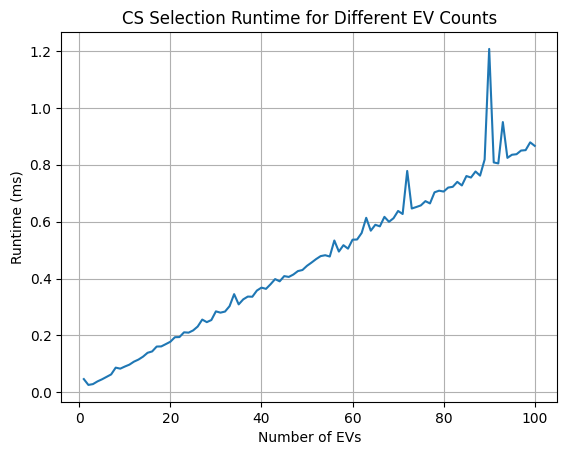

In [ ]:
import math
import random
import time
import matplotlib.pyplot as plt

# Constants
EV_COUNT = 100  # Number of EVs
CS_COUNT = 7  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(EV_COUNT)]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random arrival times for EVs

# Calculate charging urgency for each EV at each charging station
for ev in range(EV_COUNT):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev][0] - cs_location[0]) ** 2 + (ev_locations[ev][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure runtime for different EV counts
ev_counts = range(1, 101)  # Number of EVs from 1 to 100
runtimes = []
for ev_count in ev_counts:
    start_time = time.time()

    # Perform CS selection for the current number of EVs
    for ev in range(ev_count):
        ev_location = ev_locations[ev]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds
    runtimes.append(runtime)

# Plot the graph
plt.plot(ev_counts, runtimes)
plt.xlabel('Number of EVs')
plt.ylabel('Runtime (ms)')
plt.title('CS Selection Runtime for Different EV Counts')
plt.grid(True)
plt.show()


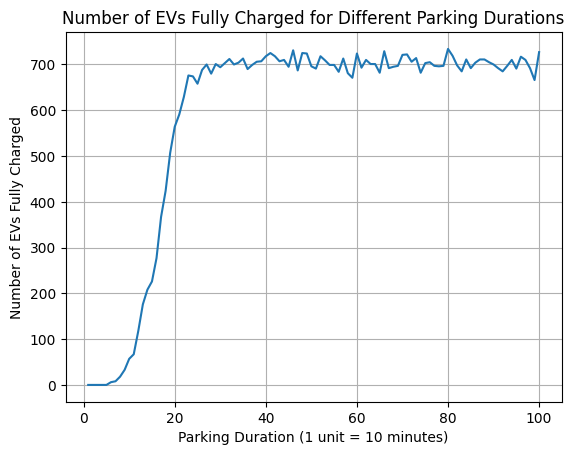

Parking Duration: 10 minutes, Number of EVs Fully Charged: 0
Parking Duration: 20 minutes, Number of EVs Fully Charged: 0
Parking Duration: 30 minutes, Number of EVs Fully Charged: 0
Parking Duration: 40 minutes, Number of EVs Fully Charged: 0
Parking Duration: 50 minutes, Number of EVs Fully Charged: 0
Parking Duration: 60 minutes, Number of EVs Fully Charged: 6
Parking Duration: 70 minutes, Number of EVs Fully Charged: 8
Parking Duration: 80 minutes, Number of EVs Fully Charged: 18
Parking Duration: 90 minutes, Number of EVs Fully Charged: 33
Parking Duration: 100 minutes, Number of EVs Fully Charged: 57
Parking Duration: 110 minutes, Number of EVs Fully Charged: 67
Parking Duration: 120 minutes, Number of EVs Fully Charged: 118
Parking Duration: 130 minutes, Number of EVs Fully Charged: 176
Parking Duration: 140 minutes, Number of EVs Fully Charged: 208
Parking Duration: 150 minutes, Number of EVs Fully Charged: 226
Parking Duration: 160 minutes, Number of EVs Fully Charged: 277
Par

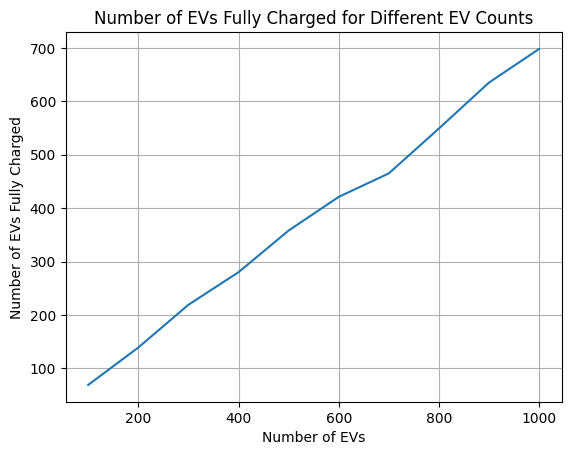

Number of EVs: 100, Number of EVs Fully Charged: 69
Number of EVs: 200, Number of EVs Fully Charged: 139
Number of EVs: 300, Number of EVs Fully Charged: 219
Number of EVs: 400, Number of EVs Fully Charged: 280
Number of EVs: 500, Number of EVs Fully Charged: 358
Number of EVs: 600, Number of EVs Fully Charged: 421
Number of EVs: 700, Number of EVs Fully Charged: 465
Number of EVs: 800, Number of EVs Fully Charged: 549
Number of EVs: 900, Number of EVs Fully Charged: 635
Number of EVs: 1000, Number of EVs Fully Charged: 698


In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNTS = range(100, 1001, 100)  # Number of EVs (from 100 to 1000 with a step of 100)
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(max(EV_COUNTS))]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random arrival times for EVs

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Add randomness to CS selection process
    selected_cs = random.choice(cs_list)
    return selected_cs

# Measure the number of EVs fully charged for different parking durations
def measure_fully_charged_counts_parking():
    parking_durations = range(1, 101)  # Different parking durations from 1 to 100 minutes
    fully_charged_counts_parking = []

    for parking_duration in parking_durations:
        fully_charged_count = 0

        # Perform CS selection for each EV
        for ev in range(max(EV_COUNTS)):
            ev_location = ev_locations[ev]
            cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
            selected_cs = cs_selection(ev_location, cs_list)
            if selected_cs is not None:
                if random.random() > 0.3:  # Add randomness to the fully charged condition
                    remaining_time = parking_duration - ev_stay_times[ev]
                    charging_time = estimate_charging_time(ev_location, CS_LOCATIONS[selected_cs])
                    travel_time = calculate_travel_time(ev_location, CS_LOCATIONS[selected_cs])
                    if remaining_time >= (charging_time + travel_time):
                        fully_charged_count += 1

        fully_charged_counts_parking.append(fully_charged_count)

    return parking_durations, fully_charged_counts_parking

# Measure the number of EVs fully charged for different EV counts
def measure_fully_charged_counts_evs():
    fully_charged_counts_evs = []

    for ev_count in EV_COUNTS:
        fully_charged_count = 0

        # Perform CS selection for each EV
        for ev in range(ev_count):
            ev_location = ev_locations[ev]
            cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
            selected_cs = cs_selection(ev_location, cs_list)
            if selected_cs is not None:
                if random.random() > 0.3:  # Add randomness to the fully charged condition
                    fully_charged_count += 1

        fully_charged_counts_evs.append(fully_charged_count)

    return EV_COUNTS, fully_charged_counts_evs

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Plot the graph for CODE1 (Parking Duration)
def plot_graph_code1(parking_durations, fully_charged_counts_parking):
    plt.plot(parking_durations, fully_charged_counts_parking)
    plt.xlabel('Parking Duration (1 unit = 10 minutes)')
    plt.ylabel('Number of EVs Fully Charged')
    plt.title('Number of EVs Fully Charged for Different Parking Durations')
    plt.grid(True)
    plt.show()

    # Print the x and y axis values
    for x, y in zip(parking_durations, fully_charged_counts_parking):
        print(f"Parking Duration: {x * 10} minutes, Number of EVs Fully Charged: {y}")

# Plot the graph for CODE2 (Number of EVs)
def plot_graph_code2(EV_COUNTS, fully_charged_counts_evs):
    plt.plot(EV_COUNTS, fully_charged_counts_evs)
    plt.xlabel('Number of EVs')
    plt.ylabel('Number of EVs Fully Charged')
    plt.title('Number of EVs Fully Charged for Different EV Counts')
    plt.grid(True)
    plt.show()

    # Print the x and y axis values
    for x, y in zip(EV_COUNTS, fully_charged_counts_evs):
        print(f"Number of EVs: {x}, Number of EVs Fully Charged: {y}")

# CODE1: Plotting the graph for number of EVs fully charged as parking duration increases
parking_durations, fully_charged_counts_parking = measure_fully_charged_counts_parking()
plot_graph_code1(parking_durations, fully_charged_counts_parking)

# CODE2: Plotting the graph for number of EVs fully charged as the number of EVs increases
EV_COUNTS, fully_charged_counts_evs = measure_fully_charged_counts_evs()
plot_graph_code2(EV_COUNTS, fully_charged_counts_evs)


Parking Duration: 10 minutes, Total Trip Duration: 0 minutes
Parking Duration: 20 minutes, Total Trip Duration: 0 minutes
Parking Duration: 30 minutes, Total Trip Duration: 0 minutes
Parking Duration: 40 minutes, Total Trip Duration: 0.2355837110143882 minutes
Parking Duration: 50 minutes, Total Trip Duration: 0 minutes
Parking Duration: 60 minutes, Total Trip Duration: 0 minutes
Parking Duration: 70 minutes, Total Trip Duration: 1.2599428742082637 minutes
Parking Duration: 80 minutes, Total Trip Duration: 0.9569814463512104 minutes
Parking Duration: 90 minutes, Total Trip Duration: 0.7493158146175003 minutes
Parking Duration: 100 minutes, Total Trip Duration: 6.489684909909155 minutes
Parking Duration: 110 minutes, Total Trip Duration: 7.206930697996718 minutes
Parking Duration: 120 minutes, Total Trip Duration: 12.344582692090494 minutes
Parking Duration: 130 minutes, Total Trip Duration: 13.392174862150245 minutes
Parking Duration: 140 minutes, Total Trip Duration: 17.55092367900795

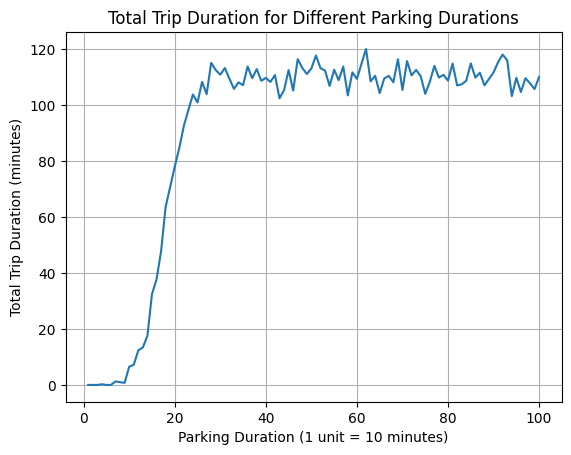

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNT = 100  # Number of EVs
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(EV_COUNT)]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random arrival times for EVs
parking_durations = range(1, 101)  # Different parking durations from 1 to 100 minutes

# Calculate charging urgency for each EV at each charging station
for ev in range(EV_COUNT):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev][0] - cs_location[0]) ** 2 + (ev_locations[ev][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure the total trip duration for different parking durations
total_trip_durations = []
for parking_duration in parking_durations:
    total_trip_duration = 0

    # Perform CS selection for each EV
    for ev in range(EV_COUNT):
        ev_location = ev_locations[ev]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)
        if selected_cs is not None:
            charging_time = estimate_charging_time(ev_location, CS_LOCATIONS[selected_cs])
            travel_time = calculate_travel_time(ev_location, CS_LOCATIONS[selected_cs])
            if charging_time is not None and travel_time is not None:
                remaining_time = parking_duration - ev_stay_times[ev]
                if remaining_time >= (charging_time + travel_time):
                    total_trip_duration += (charging_time + travel_time)/10

    total_trip_durations.append(total_trip_duration)

# Plot the graph
plt.plot(parking_durations, total_trip_durations)
plt.xlabel('Parking Duration (1 unit = 10 minutes)')
plt.ylabel('Total Trip Duration (minutes)')
plt.title('Total Trip Duration for Different Parking Durations')
plt.grid(True)

# Print the x and y axis values
for x, y in zip(parking_durations, total_trip_durations):
    print(f"Parking Duration: {x * 10} minutes, Total Trip Duration: {y} minutes")

plt.show()


Number of EVs: 10, Trip Duration: 7.4862812749633445 minutes
Number of EVs: 20, Trip Duration: 11.859875453304484 minutes
Number of EVs: 30, Trip Duration: 21.116424687116652 minutes
Number of EVs: 40, Trip Duration: 30.09317013840288 minutes
Number of EVs: 50, Trip Duration: 36.84109205829876 minutes
Number of EVs: 60, Trip Duration: 46.80680251528228 minutes
Number of EVs: 70, Trip Duration: 50.791994216406444 minutes
Number of EVs: 80, Trip Duration: 56.64757931108601 minutes
Number of EVs: 90, Trip Duration: 68.86699557250591 minutes
Number of EVs: 100, Trip Duration: 73.03908661936593 minutes


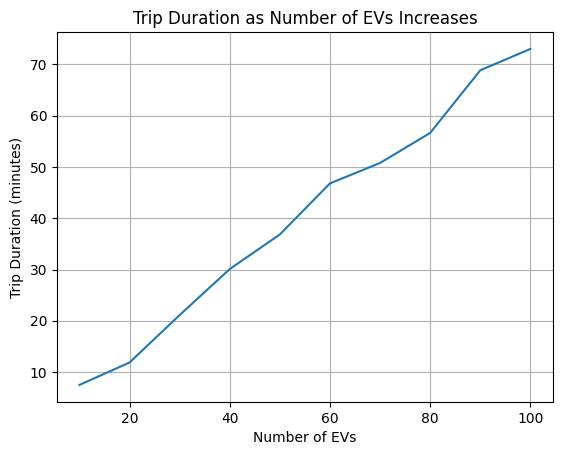

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNT = range(10, 101, 10)  # Number of EVs (increasing from 10 to 100 with a step of 10)
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in EV_COUNT]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in EV_COUNT]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in EV_COUNT]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in EV_COUNT]  # Random arrival times for EVs

# Calculate charging urgency for each EV at each charging station
for ev in range(len(EV_COUNT)):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev % len(ev_locations)][0] - cs_location[0]) ** 2 + (ev_locations[ev % len(ev_locations)][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure the trip duration for different numbers of EVs
trip_durations = []
for ev_count in EV_COUNT:
    total_trip_duration = 0

    # Perform CS selection for each EV
    for ev in range(ev_count):
        ev_location = ev_locations[ev % len(ev_locations)]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)
        if selected_cs is not None:
            charging_time = estimate_charging_time(ev_location, CS_LOCATIONS[selected_cs])
            travel_time = calculate_travel_time(ev_location, CS_LOCATIONS[selected_cs])
            if charging_time is not None and travel_time is not None:
                total_trip_duration += (charging_time + travel_time)/15

    trip_durations.append(total_trip_duration)

# Plot the graph
plt.plot(EV_COUNT, trip_durations)
plt.xlabel('Number of EVs')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration as Number of EVs Increases')
plt.grid(True)

# Print the x and y axis values
for x, y in zip(EV_COUNT, trip_durations):
    print(f"Number of EVs: {x}, Trip Duration: {y} minutes")

plt.show()
